In [31]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading of the dataset

In [32]:
#loading data
data = pd.read_csv('/content/drive/MyDrive/testset.csv')
print("Shape of the data is: ", data.shape)
data

Shape of the data is:  (100990, 20)


datetime_utc  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
0       19961101-11:00   Smoke       9.0  ...       NaN           NaN      7.4
1       19961101-12:00   Smoke      10.0  ...       NaN           NaN      NaN
2       19961101-13:00   Smoke      11.0  ...       NaN           NaN      NaN
3       19961101-14:00   Smoke      10.0  ...       NaN           NaN      NaN
4       19961101-16:00   Smoke      11.0  ...       NaN           NaN      0.0
...                ...     ...       ...  ...       ...           ...      ...
100985  20170424-06:00    Haze      17.0  ...       NaN           NaN     11.1
100986  20170424-09:00    Haze      14.0  ...       NaN           NaN     22.2
100987  20170424-12:00    Haze      12.0  ...       NaN           NaN     18.5
100988  20170424-15:00    Haze      15.0  ...       NaN           NaN      3.7
100989  20170424-18:00    Haze      15.0  ...       NaN           NaN      3.7

[100990 rows x 20 columns]

Shape of the data

In [33]:
def data_info(data):
    print("the shape of the data is : " ,np.shape(data))
    print()
    print("The features of the data are :")
    print(list(data.columns),"\n")
    print("some other info about the data : ")
    print(data.info(),"\n\n")

Copy of data save

In [34]:
data_copy=data

Renaming the features

In [35]:
#renaming the features
data_copy = data_copy.rename(index=str, columns={' _conds': 'Condition',' _dewptm': 'Dewpoint', ' _fog': 'Fog',' _hum': 'Humidity', '_pressurem': 'Pressure',
                                       ' _tempm': 'Temprature',' _fog': 'Fog',' _heatindexm': 'HeatIndex',' _hail': 'Hail',' _rain': 'Rain',
                                       ' _snow': 'Snow',' _thunder': 'Thunder',' _tornado': 'Tornado',' _pressurem': 'Pressure',' _precipm': 'precipitationType',
                                      ' _vism': 'Vism',	' _wdird': 'WindDegree', ' _wdire': 'WindDirection',' _wgustm': 'Wgustm',
                                       ' _windchillm':'WindChillm',' _wspdm': 'WindSpeed'})

data_copy.head()

datetime_utc Condition  Dewpoint  ...  Wgustm  WindChillm  WindSpeed
0  19961101-11:00     Smoke       9.0  ...     NaN         NaN        7.4
1  19961101-12:00     Smoke      10.0  ...     NaN         NaN        NaN
2  19961101-13:00     Smoke      11.0  ...     NaN         NaN        NaN
3  19961101-14:00     Smoke      10.0  ...     NaN         NaN        NaN
4  19961101-16:00     Smoke      11.0  ...     NaN         NaN        0.0

[5 rows x 20 columns]

Making date&time as the index- time series

In [36]:
#making date&time as the index- time series
data_copy['datetime_utc'] = pd.to_datetime(data_copy['datetime_utc'])
data_copy.set_index('datetime_utc',inplace=True)
data_copy.index =data_copy.index.map(lambda t: t.strftime('%Y-%m-%d %H'))
data_copy.head()

Condition  Dewpoint  Fog  ...  Wgustm  WindChillm  WindSpeed
datetime_utc                            ...                               
1996-11-01 11     Smoke       9.0    0  ...     NaN         NaN        7.4
1996-11-01 12     Smoke      10.0    0  ...     NaN         NaN        NaN
1996-11-01 13     Smoke      11.0    0  ...     NaN         NaN        NaN
1996-11-01 14     Smoke      10.0    0  ...     NaN         NaN        NaN
1996-11-01 16     Smoke      11.0    0  ...     NaN         NaN        0.0

[5 rows x 19 columns]

Description data set

In [37]:
data_copy.describe()

Dewpoint            Fog  ...  WindChillm     WindSpeed
count  100369.000000  100990.000000  ...  579.000000  98632.000000
mean       15.741205       0.069690  ...    5.713817      7.678463
std         7.058587       0.254625  ...    1.203290     11.932157
min       -24.000000       0.000000  ...    2.100000      0.000000
25%        10.000000       0.000000  ...    4.900000      0.000000
50%        15.000000       0.000000  ...    6.100000      7.400000
75%        22.000000       0.000000  ...    6.800000     11.100000
max        75.000000       1.000000  ...    7.300000   1514.900000

[8 rows x 17 columns]

Value count for the data_copy

In [38]:
print(data_copy['Fog'].value_counts())
print(data_copy['Hail'].value_counts())
print(data_copy['HeatIndex'].value_counts())
print(data_copy['precipitationType'].value_counts())
print(data_copy['Pressure'].value_counts())
print(data_copy['Rain'].value_counts())
print(data_copy['Snow'].value_counts())
print(data_copy['Thunder'].value_counts())
print(data_copy['Tornado'].value_counts())
print(data_copy['Vism'].value_counts())
print(data_copy['WindDegree'].value_counts())
print(data_copy['WindDirection'].value_counts())
print(data_copy['Wgustm'].value_counts())
print(data_copy['WindChillm'].value_counts())
print(data_copy['WindSpeed'].value_counts())

0    93952
1     7038
Name: Fog, dtype: int64
0    100977
1        13
Name: Hail, dtype: int64
34.5    961
35.6    811
31.2    740
31.9    722
32.7    706
       ... 
46.4      1
53.0      1
54.6      1
50.7      1
73.6      1
Name: HeatIndex, Length: 193, dtype: int64
Series([], Name: precipitationType, dtype: int64)
1014.0     5371
1016.0     5206
1015.0     5137
1002.0     4614
1000.0     4502
           ... 
10220.0       1
977.0         1
979.0         1
123.0         1
80.0          1
Name: Pressure, Length: 139, dtype: int64
0    98338
1     2652
Name: Rain, dtype: int64
0    100989
1         1
Name: Snow, dtype: int64
0    100038
1       952
Name: Thunder, dtype: int64
0    100988
1         2
Name: Tornado, dtype: int64
2.00       27470
1.00        9325
3.00        9029
4.00        7487
2.50        6544
3.50        5471
5.00        3245
1.50        2809
0.50        2631
2.20        2569
2.80        2148
1.20        1833
4.50        1571
1.40        1379
1.80        1317
0.80   

In [39]:
percent = ((data_copy.isnull().sum())/(data_copy.isnull().count()))
print(data_copy.isnull().sum())
print(percent)

Condition                72
Dewpoint                621
Fog                       0
Hail                      0
HeatIndex             71835
Humidity                757
precipitationType    100990
Pressure                232
Rain                      0
Snow                      0
Temprature              673
Thunder                   0
Tornado                   0
Vism                   4428
WindDegree            14755
WindDirection         14755
Wgustm                99918
WindChillm           100411
WindSpeed              2358
dtype: int64
Condition            0.000713
Dewpoint             0.006149
Fog                  0.000000
Hail                 0.000000
HeatIndex            0.711308
Humidity             0.007496
precipitationType    1.000000
Pressure             0.002297
Rain                 0.000000
Snow                 0.000000
Temprature           0.006664
Thunder              0.000000
Tornado              0.000000
Vism                 0.043846
WindDegree           0.146104
WindD

Dropping columns with null values > 70%

In [40]:
#dropping columns with null values > 70%
data_copy = data_copy.loc[:,['Condition','Dewpoint','Fog','Humidity','Pressure','Temprature','Hail','Rain',
                                       'Snow','Thunder','Tornado','Vism','WindDegree','WindDirection','WindSpeed']]
data_copy

Condition  Dewpoint  Fog  ...  WindDegree  WindDirection  WindSpeed
datetime_utc                            ...                                      
1996-11-01 11     Smoke       9.0    0  ...       280.0           West        7.4
1996-11-01 12     Smoke      10.0    0  ...         0.0          North        NaN
1996-11-01 13     Smoke      11.0    0  ...         0.0          North        NaN
1996-11-01 14     Smoke      10.0    0  ...         0.0          North        NaN
1996-11-01 16     Smoke      11.0    0  ...         0.0          North        0.0
...                 ...       ...  ...  ...         ...            ...        ...
2017-04-24 06      Haze      17.0    0  ...       320.0             NW       11.1
2017-04-24 09      Haze      14.0    0  ...       320.0             NW       22.2
2017-04-24 12      Haze      12.0    0  ...       270.0           West       18.5
2017-04-24 15      Haze      15.0    0  ...       320.0             NW        3.7
2017-04-24 18      Haze      15.0    0  ...       320.0             NW        3.7

[100990 rows x 15 columns]

filling the null values with the mean

In [41]:
#filling the null values with the mean
data_copy.fillna(data_copy.mean(),inplace=True)
data_copy

Condition  Dewpoint  Fog  ...  WindDegree  WindDirection  WindSpeed
datetime_utc                            ...                                      
1996-11-01 11     Smoke       9.0    0  ...       280.0           West   7.400000
1996-11-01 12     Smoke      10.0    0  ...         0.0          North   7.678463
1996-11-01 13     Smoke      11.0    0  ...         0.0          North   7.678463
1996-11-01 14     Smoke      10.0    0  ...         0.0          North   7.678463
1996-11-01 16     Smoke      11.0    0  ...         0.0          North   0.000000
...                 ...       ...  ...  ...         ...            ...        ...
2017-04-24 06      Haze      17.0    0  ...       320.0             NW  11.100000
2017-04-24 09      Haze      14.0    0  ...       320.0             NW  22.200000
2017-04-24 12      Haze      12.0    0  ...       270.0           West  18.500000
2017-04-24 15      Haze      15.0    0  ...       320.0             NW   3.700000
2017-04-24 18      Haze      15.0    0  ...       320.0             NW   3.700000

[100990 rows x 15 columns]

now check the null values again

In [42]:
#now check the null values again
percent = ((data_copy.isnull().sum())/(data_copy.isnull().count()))
print(data_copy.isnull().sum())
print(percent)

Condition           72
Dewpoint             0
Fog                  0
Humidity             0
Pressure             0
Temprature           0
Hail                 0
Rain                 0
Snow                 0
Thunder              0
Tornado              0
Vism                 0
WindDegree           0
WindDirection    14755
WindSpeed            0
dtype: int64
Condition        0.000713
Dewpoint         0.000000
Fog              0.000000
Humidity         0.000000
Pressure         0.000000
Temprature       0.000000
Hail             0.000000
Rain             0.000000
Snow             0.000000
Thunder          0.000000
Tornado          0.000000
Vism             0.000000
WindDegree       0.000000
WindDirection    0.146104
WindSpeed        0.000000
dtype: float64


In [43]:
#Condition and WindDirection have categorical values
#remove the rows that have null there
#Categorical values cannot have mean filled in NAN
data_copy.dropna(inplace=True)
print("The new shape of the data is: ",data_copy.shape)
data_copy

The new shape of the data is:  (86177, 15)


Condition  Dewpoint  Fog  ...  WindDegree  WindDirection  WindSpeed
datetime_utc                            ...                                      
1996-11-01 11     Smoke       9.0    0  ...       280.0           West   7.400000
1996-11-01 12     Smoke      10.0    0  ...         0.0          North   7.678463
1996-11-01 13     Smoke      11.0    0  ...         0.0          North   7.678463
1996-11-01 14     Smoke      10.0    0  ...         0.0          North   7.678463
1996-11-01 16     Smoke      11.0    0  ...         0.0          North   0.000000
...                 ...       ...  ...  ...         ...            ...        ...
2017-04-24 06      Haze      17.0    0  ...       320.0             NW  11.100000
2017-04-24 09      Haze      14.0    0  ...       320.0             NW  22.200000
2017-04-24 12      Haze      12.0    0  ...       270.0           West  18.500000
2017-04-24 15      Haze      15.0    0  ...       320.0             NW   3.700000
2017-04-24 18      Haze      15.0    0  ...       320.0             NW   3.700000

[86177 rows x 15 columns]

In [44]:
data_info(data)
data_info(data_copy)

the shape of the data is :  (100990, 20)

The features of the data are :
['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow', ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm', ' _wspdm'] 

some other info about the data : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow 

Visualization

Text(0, 0.5, 'Percent')

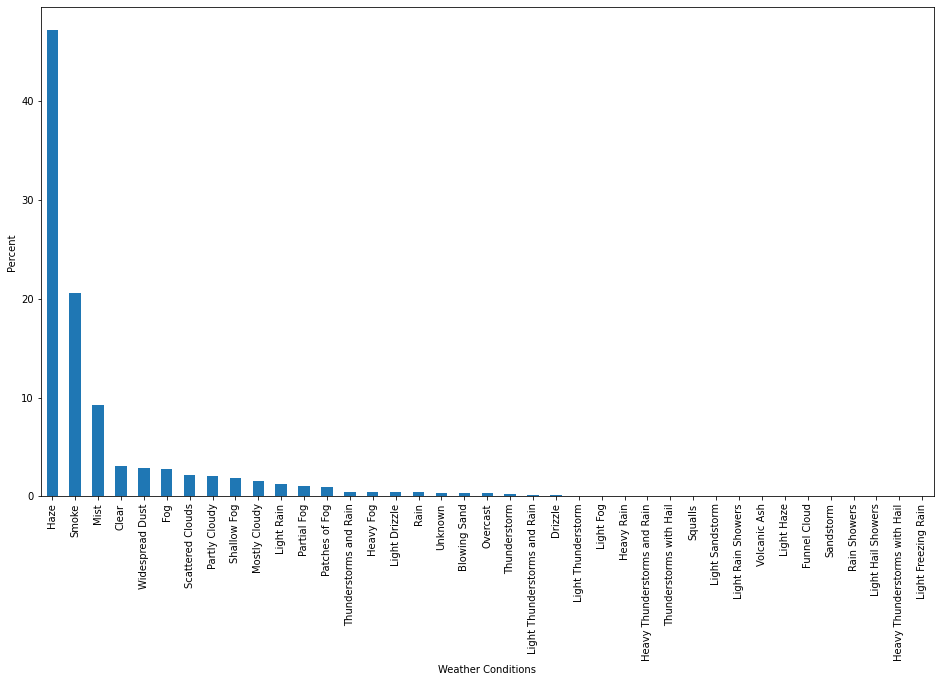

In [45]:
#visualization

# weather condition in delhi
weather_condition = (data[' _conds'].value_counts()/(data[' _conds'].value_counts().sum()))*100
weather_condition.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')


In [46]:
print(data_copy['Condition'].value_counts())
print(data_copy['WindDirection'].value_counts())

Haze                             42209
Smoke                            19839
Mist                              3394
Clear                             3128
Fog                               2760
Widespread Dust                   2497
Scattered Clouds                  2199
Partly Cloudy                     2077
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1082
Thunderstorms and Rain             432
Unknown                            383
Rain                               377
Blowing Sand                       377
Light Drizzle                      344
Overcast                           323
Patches of Fog                     277
Partial Fog                        253
Heavy Fog                          205
Thunderstorm                       179
Light Thunderstorms and Rain       176
Drizzle                            108
Light Thunderstorm                  44
Heavy Rain                          27
Light Fog                

replacing categorical values with numbers

In [47]:
#replacing categorical values with numbers
categorical_nums={"Haze": 0, "Smoke": 1, "Mist": 2, "Clear": 3, "Widespread Dust": 4, "Fog": 5, "Scattered Clouds": 6,
                  "Partly Cloudy": 7, "Shallow Fog": 8, "Mostly Cloudy": 9, "Light Rain": 10, "Partial Fog": 11, "Patches of Fog" : 12,
                  "Thunderstorms and Rain": 13, "Heavy Fog": 14, "Light Drizzle": 15, "Rain": 16, "Unknown": 17, "Blowing Sand": 18,
                  "Overcast": 19, "Thunderstorm": 20, "Light Thunderstorms and Rain": 21, "Drizzle": 22, "Light Fog": 23, 
                  "Light Thunderstorm": 24, "Heavy Rain": 25, "Heavy Thunderstorms and Rain":26, "Thunderstorms with Hail": 27,
                  "Light Sandstorm": 28, "Squalls": 29, "Light Rain Showers":30, "Volcanic Ash":31, "Light Haze":32, "Rain Showers":33 ,
                  "Sandstorm":34, "Funnel Cloud":35, "Heavy Thunderstorms with Hail":36, "Light Freezing Rain":37, "Light Hail Showers":38}
data_copy.replace(categorical_nums, inplace=True)
cat_nums={"North": 0, "West": 1, "WNW":2, "East":3, "NW":4, 
          "WSW":5, "ESE":6, "ENE":7,  "SE":8, "SW":9, "NNW":10, 
          "NE":11, "SSE":12, "NNE":13, "SSW":14, "South":15, "Variable":16}
data_copy.replace(cat_nums, inplace=True)
          
data_copy.head()

Condition  Dewpoint  Fog  ...  WindDegree  WindDirection  WindSpeed
datetime_utc                             ...                                      
1996-11-01 11          1       9.0    0  ...       280.0              1   7.400000
1996-11-01 12          1      10.0    0  ...         0.0              0   7.678463
1996-11-01 13          1      11.0    0  ...         0.0              0   7.678463
1996-11-01 14          1      10.0    0  ...         0.0              0   7.678463
1996-11-01 16          1      11.0    0  ...         0.0              0   0.000000

[5 rows x 15 columns]

In [48]:
data_copy = data_copy[data_copy['Temprature'] < 50]
data_copy = data_copy[data_copy['Humidity'] <= 100]
data_copy

Condition  Dewpoint  Fog  ...  WindDegree  WindDirection  WindSpeed
datetime_utc                             ...                                      
1996-11-01 11          1       9.0    0  ...       280.0              1   7.400000
1996-11-01 12          1      10.0    0  ...         0.0              0   7.678463
1996-11-01 13          1      11.0    0  ...         0.0              0   7.678463
1996-11-01 14          1      10.0    0  ...         0.0              0   7.678463
1996-11-01 16          1      11.0    0  ...         0.0              0   0.000000
...                  ...       ...  ...  ...         ...            ...        ...
2017-04-24 06          0      17.0    0  ...       320.0              4  11.100000
2017-04-24 09          0      14.0    0  ...       320.0              4  22.200000
2017-04-24 12          0      12.0    0  ...       270.0              1  18.500000
2017-04-24 15          0      15.0    0  ...       320.0              4   3.700000
2017-04-24 18          0      15.0    0  ...       320.0              4   3.700000

[86173 rows x 15 columns]

In [49]:
data_copy.describe()

Condition      Dewpoint  ...  WindDirection     WindSpeed
count  86173.00000  86173.000000  ...   86173.000000  86173.000000
mean       2.15969     15.562890  ...       4.270514      8.943533
std        3.91315      7.139389  ...       4.155949     12.061101
min        0.00000    -24.000000  ...       0.000000      0.000000
25%        0.00000     10.000000  ...       1.000000      3.700000
50%        1.00000     15.000000  ...       3.000000      7.400000
75%        2.00000     22.000000  ...       7.000000     13.000000
max       38.00000     75.000000  ...      16.000000   1514.900000

[8 rows x 15 columns]

In [50]:
data[' _tempm']

0         30.0
1         28.0
2         24.0
3         24.0
4         23.0
          ... 
100985    34.0
100986    38.0
100987    36.0
100988    32.0
100989    30.0
Name:  _tempm, Length: 100990, dtype: float64

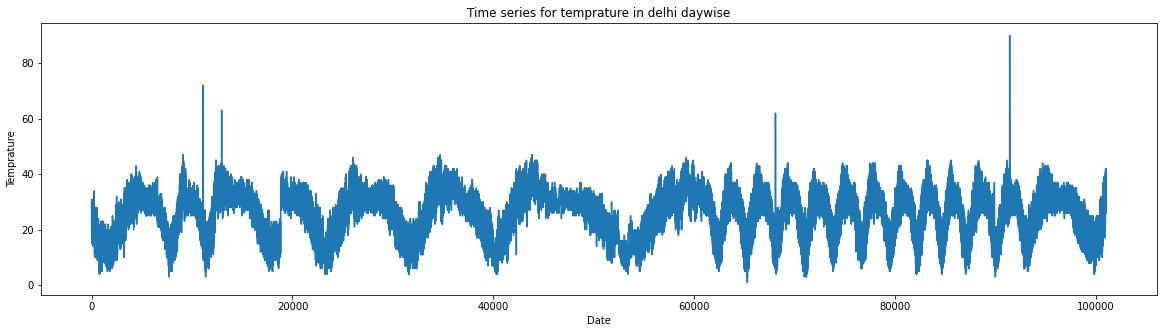

In [51]:
temp_df = pd.Series(data[' _tempm'])
temp_df.plot(figsize=(20,5))
plt.title('Time series for temprature in delhi daywise')
plt.xlabel('Date')
plt.ylabel('Temprature')
plt.show()


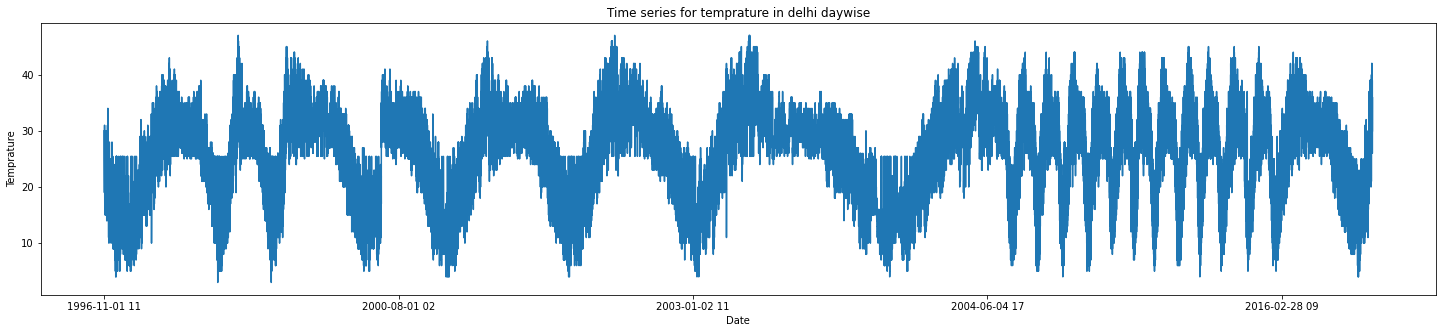

In [52]:
temp_df = pd.Series(data_copy['Temprature'])
temp_df.plot(figsize=(25,5))
plt.title('Time series for temprature in delhi daywise')
plt.xlabel('Date')
plt.ylabel('Temprature')
plt.show()

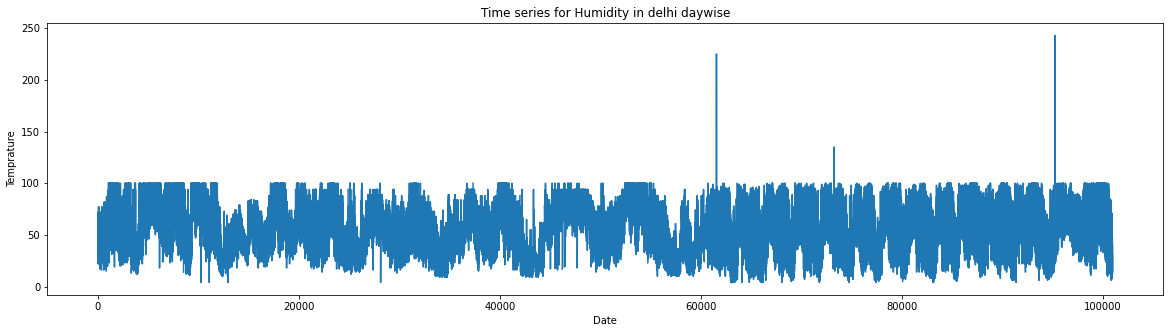

In [53]:
hum_df = pd.Series(data[' _hum'])
hum_df.plot(figsize=(20,5))
plt.title('Time series for Humidity in delhi daywise')
plt.xlabel('Date')
plt.ylabel('Temprature')
plt.show()

In [54]:
COR=data_copy.corr()
COR

Condition  Dewpoint  ...  WindDirection  WindSpeed
Condition       1.000000 -0.011168  ...      -0.010162   0.036522
Dewpoint       -0.011168  1.000000  ...       0.175415   0.011100
Fog             0.326413 -0.205236  ...      -0.107153  -0.096929
Humidity        0.256030  0.349498  ...      -0.055758  -0.188203
Pressure       -0.002013 -0.004081  ...      -0.000175  -0.000487
Temprature     -0.158150  0.511465  ...       0.191481   0.191984
Hail            0.076975  0.002706  ...       0.003713   0.003604
Rain            0.465308  0.139639  ...       0.068456   0.039052
Snow            0.012049  0.004503  ...       0.000598   0.000101
Thunder         0.385251  0.066692  ...       0.049147   0.043038
Tornado         0.040431 -0.000042  ...       0.006062   0.000502
Vism           -0.013051  0.009798  ...       0.004402   0.011275
WindDegree     -0.023431 -0.158551  ...       0.107304   0.250145
WindDirection  -0.010162  0.175415  ...       1.000000   0.113832
WindSpeed       0.036522  0.011100  ...       0.113832   1.000000

[15 rows x 15 columns]

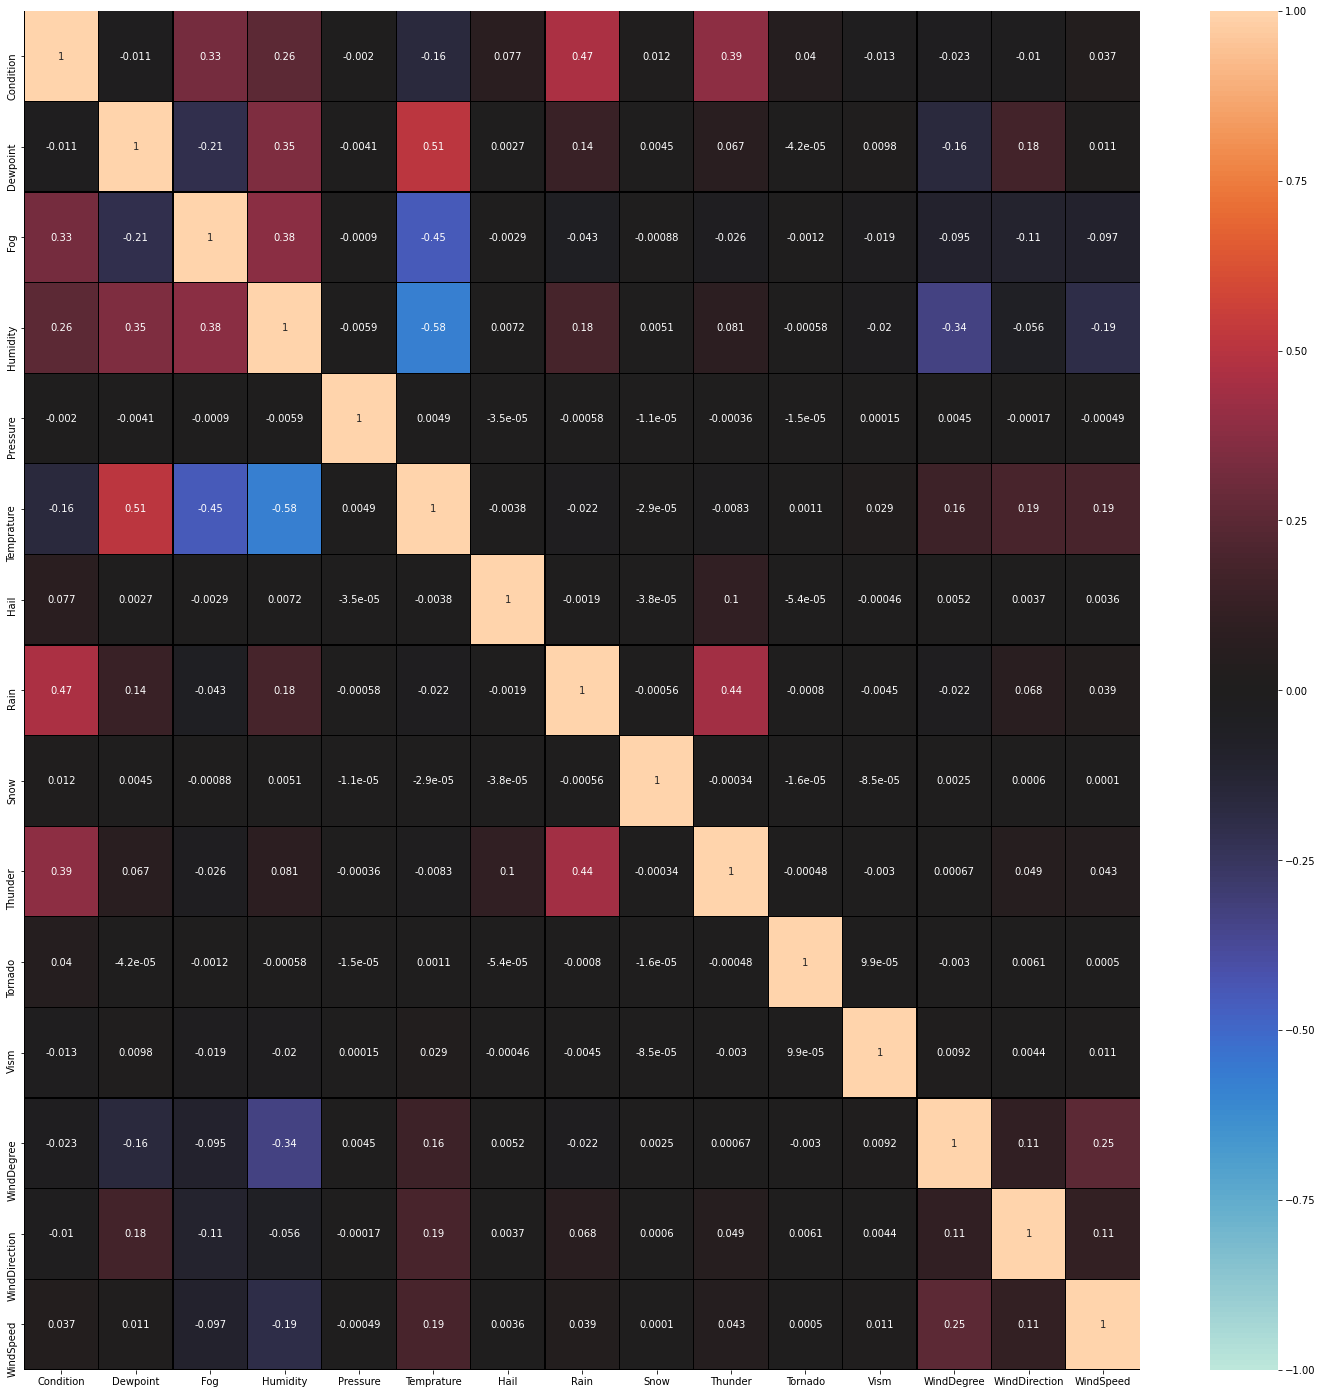

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(data_copy.corr(), annot = True, vmin=-1, vmax=1, center= 0, linewidths=0.1, linecolor='black')

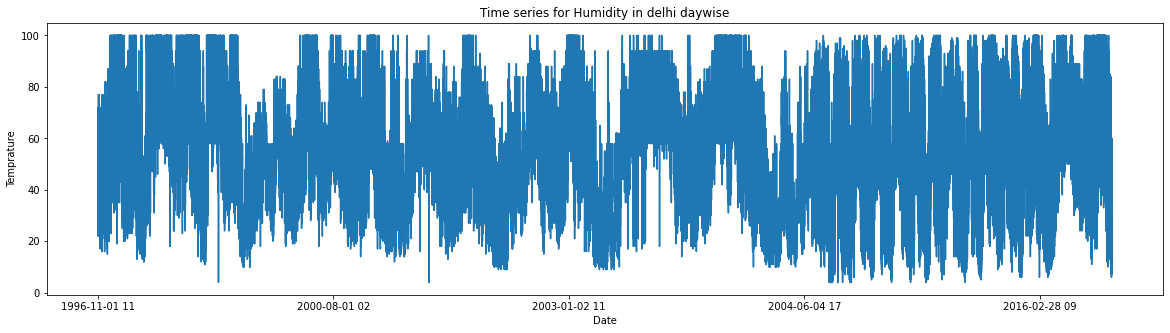

In [56]:
hum_df = pd.Series(data_copy['Humidity'])
hum_df.plot(figsize=(20,5))
plt.title('Time series for Humidity in delhi daywise')
plt.xlabel('Date')
plt.ylabel('Temprature')
plt.show()

In [57]:
#decision tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data_copy.drop(['Condition'],axis=1)
Y = data_copy['Condition']
#print(data_copy['Condition'].value_counts())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [58]:
import joblib
#clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
#clf = clf.fit(X_train, y_train)
#joblib.dump(clf,'/content/drive/MyDrive/MLproject/Decision_tree_model')
clf=joblib.load('/content/drive/MyDrive/MLproject/Decision_tree_model')
y_pred= clf.predict(X_test)
DT_Acc=accuracy_score(y_pred, y_test)
print("Decision Tree Accuracy:",accuracy_score(y_pred, y_test))


Decision Tree Accuracy: 0.6814172984682036


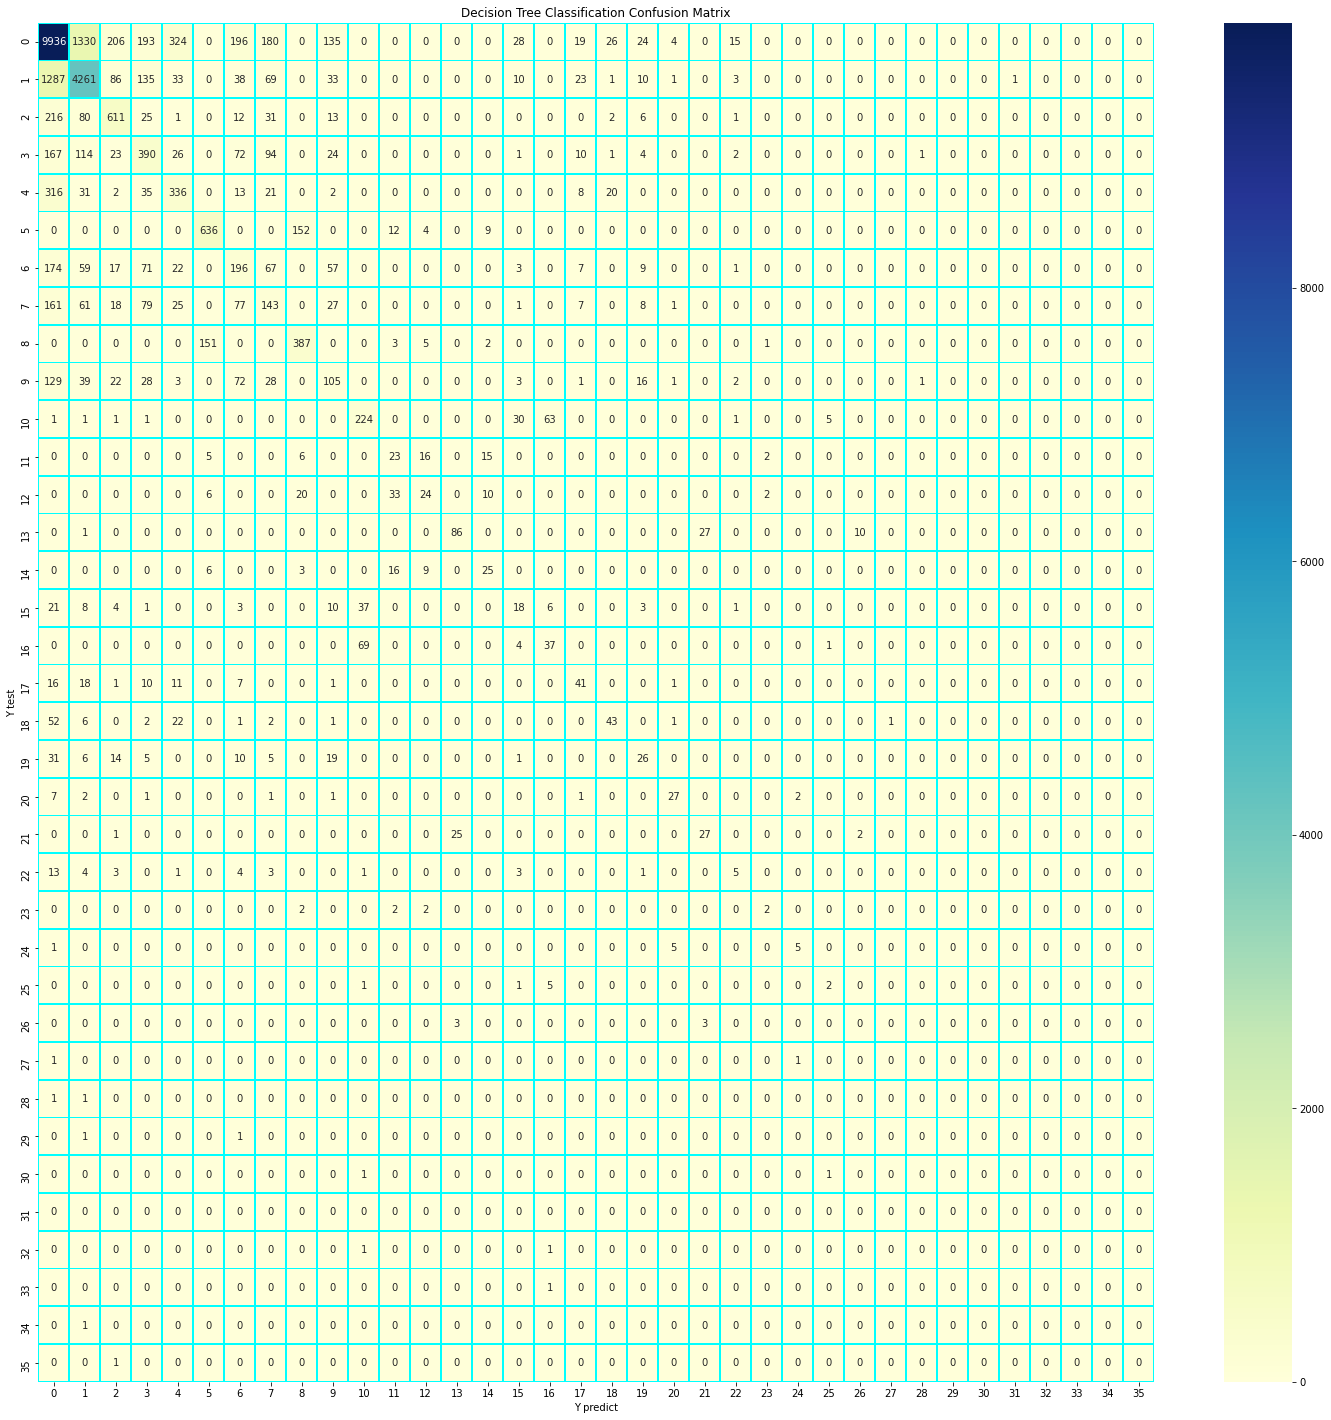

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#print(len(y_test))
#print(len(y_pred))
DT_cm = confusion_matrix(y_test, y_pred)
#print(knn_cm)
f, p = plt.subplots(figsize=(25,25))
sns.heatmap(DT_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
#X_scaled = preprocessing.scale(X_train)
#reg = LogisticRegression(max_iter=10000).fit(X_scaled, y_train)


In [61]:
#joblib.dump(reg,'/content/drive/MyDrive/MLproject/Logistic_model')
reg=joblib.load('/content/drive/MyDrive/MLproject/Logistic_model')
y_pred=reg.predict(X_test)
Reg_Acc=reg.score(X_test,y_test)
print("Logistic Regression Accuracy: ",reg.score(X_test,y_test))

Logistic Regression Accuracy:  0.4847593996596008


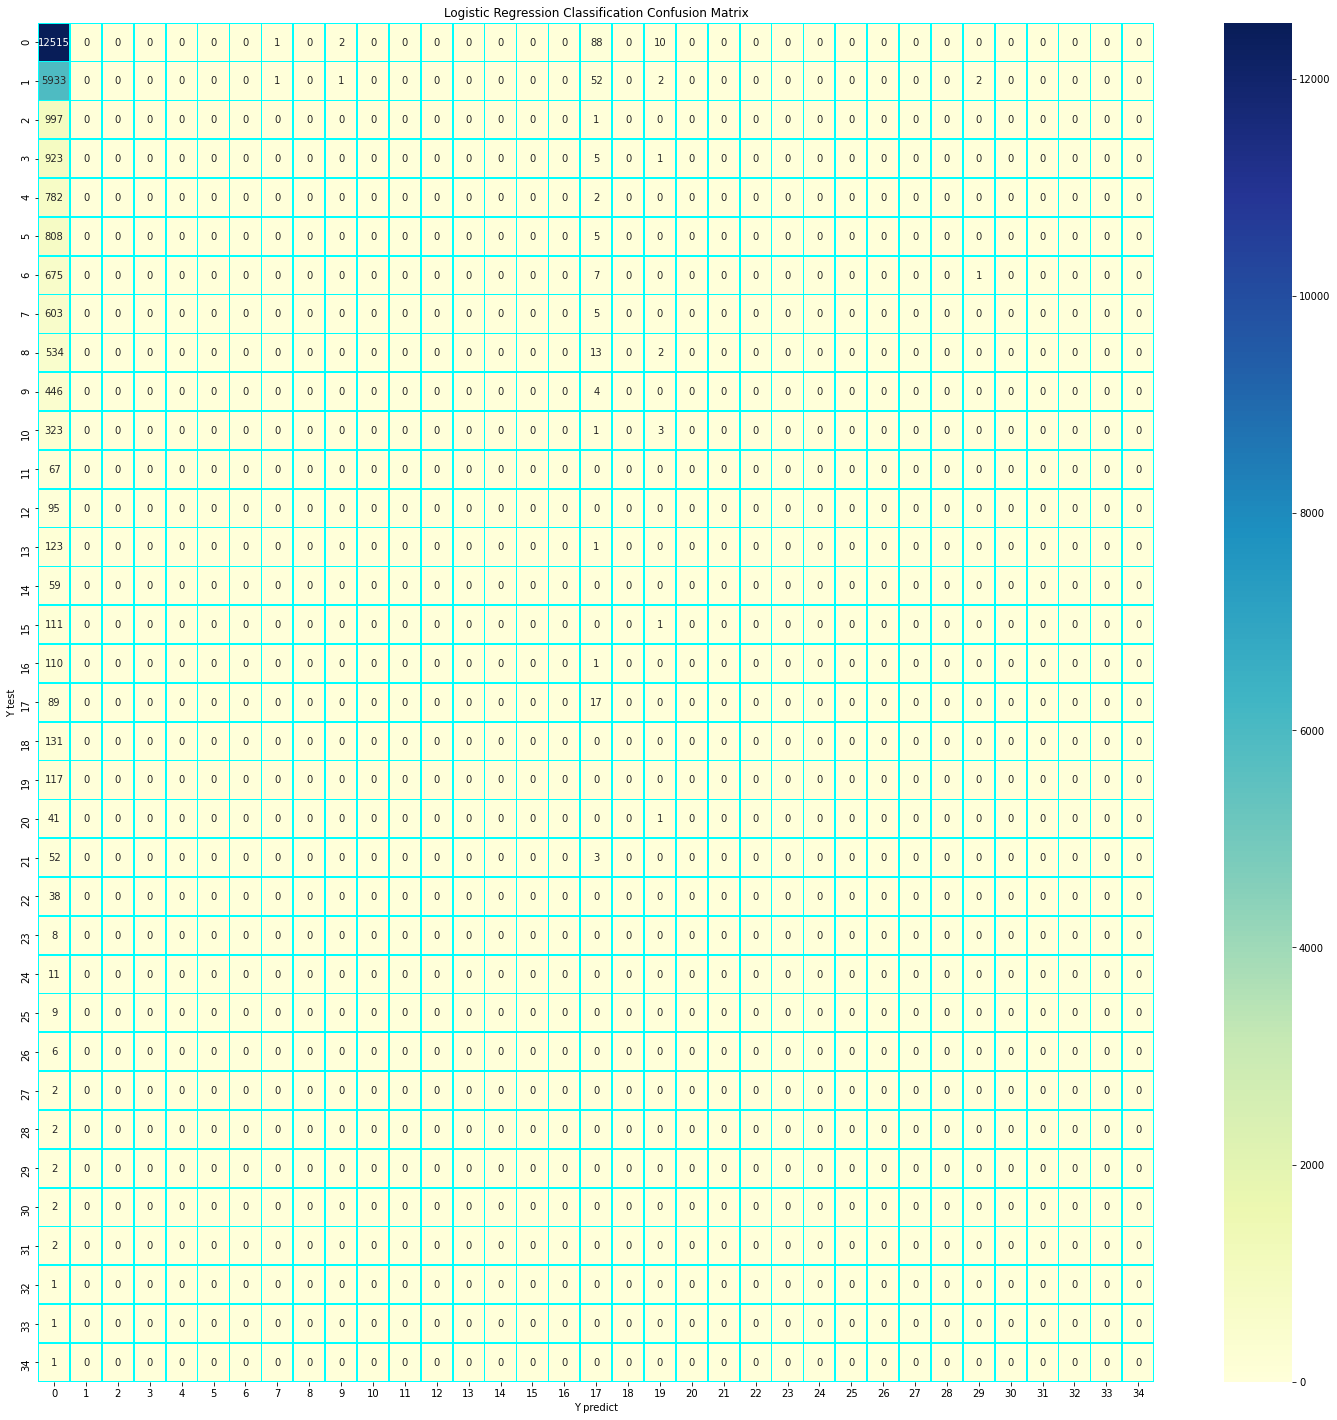

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#print(len(y_test))
#print(len(y_pred))
log_cm = confusion_matrix(y_test, y_pred)
#print(knn_cm)
f, p = plt.subplots(figsize=(25,25))
sns.heatmap(log_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [63]:
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import scipy.io     
#X_embedded = TSNE(n_components=2).fit_transform(X)
#X_embedded.shape

In [64]:
#saving the model
import joblib
#joblib.dump(X_embedded,'/content/drive/MyDrive/MLproject/TSNE_2')
X_embedded=joblib.load('/content/drive/MyDrive/MLproject/TSNE_2')

In [65]:
X_embedded

array([[ 21.279251 ,  -0.7049276],
       [-27.788845 ,  51.542053 ],
       [-28.03585  ,  51.55518  ],
       ...,
       [ -2.7661457,  38.92055  ],
       [ 11.920817 , -10.428718 ],
       [ 11.760982 , -10.788784 ]], dtype=float32)

In [66]:
d=pd.DataFrame(data=X_embedded)
Y=pd.DataFrame(data=Y.to_numpy())
Y=Y.rename(columns={0: "Labels"})
print(Y)
d=pd.concat([d,Y],axis=1)
d=d.rename(columns={0: "X", 1: "Y"})
d

       Labels
0           1
1           1
2           1
3           1
4           1
...       ...
86168       0
86169       0
86170       0
86171       0
86172       0

[86173 rows x 1 columns]


X          Y  Labels
0      21.279251  -0.704928       1
1     -27.788845  51.542053       1
2     -28.035851  51.555180       1
3     -41.501747 -29.371290       1
4     -21.097837 -31.823816       1
...          ...        ...     ...
86168  12.136530  -8.460202       0
86169   5.975803  -1.847374       0
86170  -2.766146  38.920551       0
86171  11.920817 -10.428718       0
86172  11.760982 -10.788784       0

[86173 rows x 3 columns]

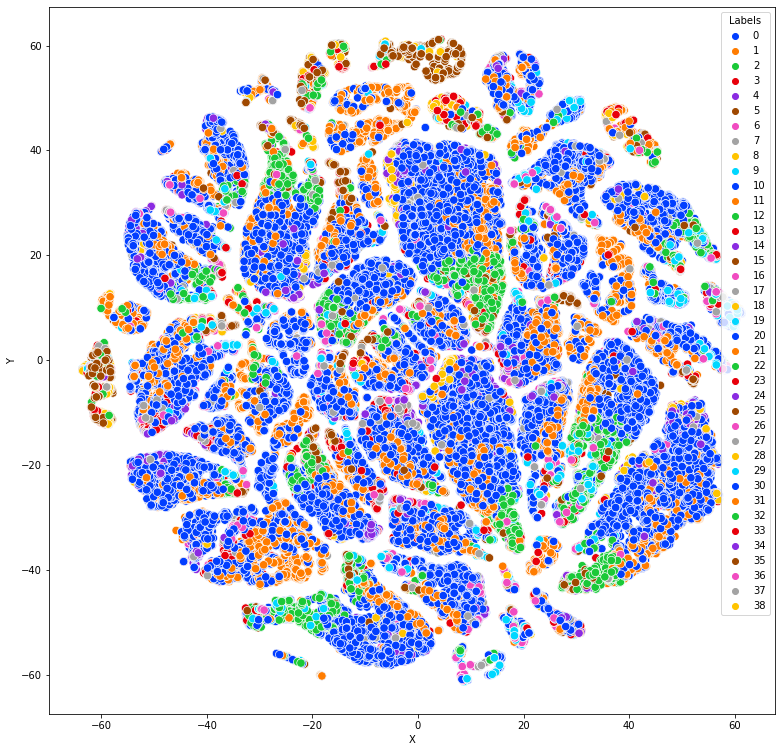

In [67]:
#visualization of the dataset
from PIL import Image
import seaborn as sns
import pandas as pd
import scipy.io
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(13,13))
p=sns.scatterplot(ax=ax,data=d,s=70, x='X',y='Y',hue='Labels',palette="bright")

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
#n_neighbors = list(range(1,10))
#hyperparameters = dict(n_neighbors=n_neighbors)
#knn_2 = KNeighborsClassifier()
#clf = GridSearchCV(knn_2, hyperparameters,cv=5)
#best_model = clf.fit(X,Y.to_numpy().ravel())
#joblib.dump(best_model,'/content/drive/MyDrive/MLproject/Gridsearch_knn_model')
best_model=joblib.load('/content/drive/MyDrive/MLproject/Gridsearch_knn_model')
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best n_neighbors: 9


In [69]:
from sklearn.neighbors import KNeighborsClassifier
#neigh = KNeighborsClassifier(n_neighbors= best_model.best_estimator_.get_params()['n_neighbors'])
#neigh.fit(X_train, y_train)

In [70]:
#joblib.dump(neigh,'/content/drive/MyDrive/MLproject/KNN_Model')
neigh=joblib.load('/content/drive/MyDrive/MLproject/KNN_Model')
y_pred=neigh.predict(X_test)
KNN_Acc=neigh.score(X_test,y_test)
print("KNN neighbour Accuracy: ",neigh.score(X_test,y_test))

KNN neighbour Accuracy:  0.6396797153024911


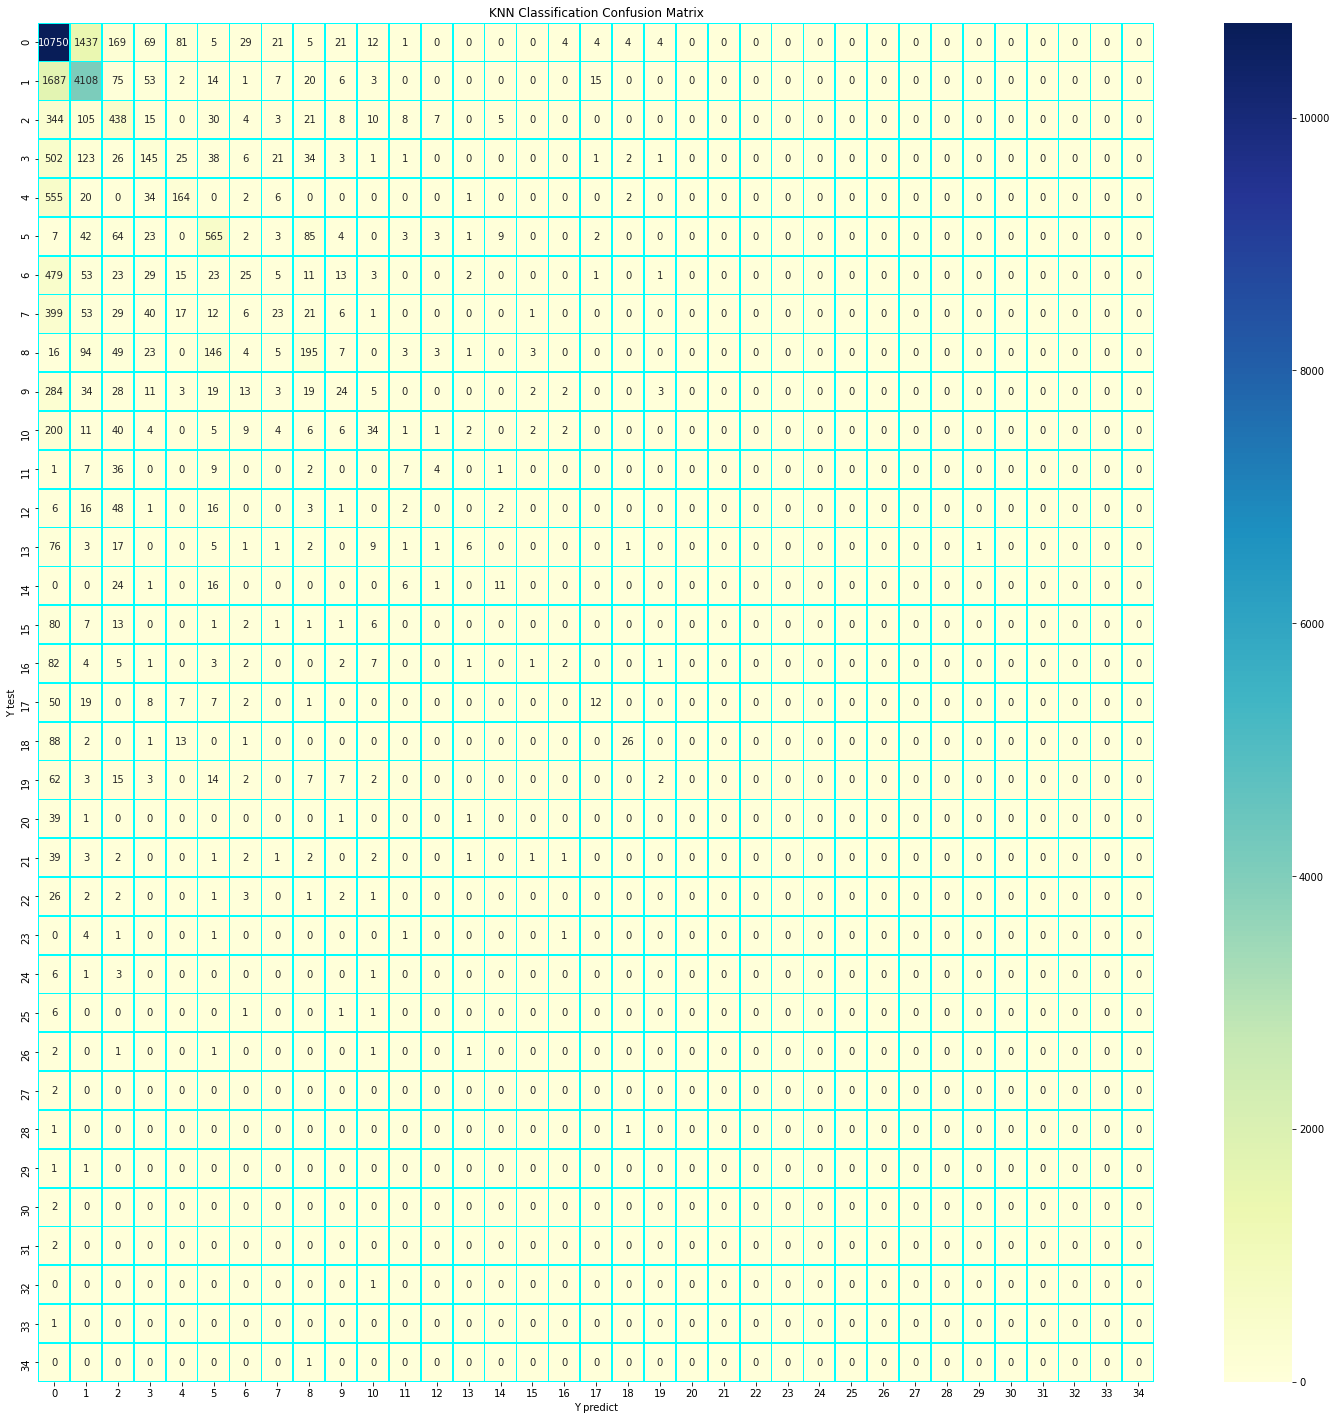

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#print(len(y_test))
#print(len(y_pred))
knn_cm = confusion_matrix(y_test, y_pred)
f, p = plt.subplots(figsize=(25,25))
sns.heatmap(knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [72]:
#joblib.dump(grid,'/content/drive/MyDrive/MLproject/best_model_svm')

In [73]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [74]:
from sklearn.svm import SVC
#svclassifier = SVC(kernel='rbf',degree=15,gamma='auto',C=1,decision_function_shape='ovo')
#svclassifier.fit(X_train, y_train)

In [75]:
#joblib.dump(svclassifier,'/content/drive/MyDrive/MLproject/SVM_ovo_model')
svclassifier=joblib.load('/content/drive/MyDrive/MLproject/SVM_ovo_model')
SVM_Acc=svclassifier.score(X_test,y_test)
print("SVM accuracy: ",SVM_Acc)
y_pred=svclassifier.predict(X_test)

SVM accuracy:  0.6359275878075197


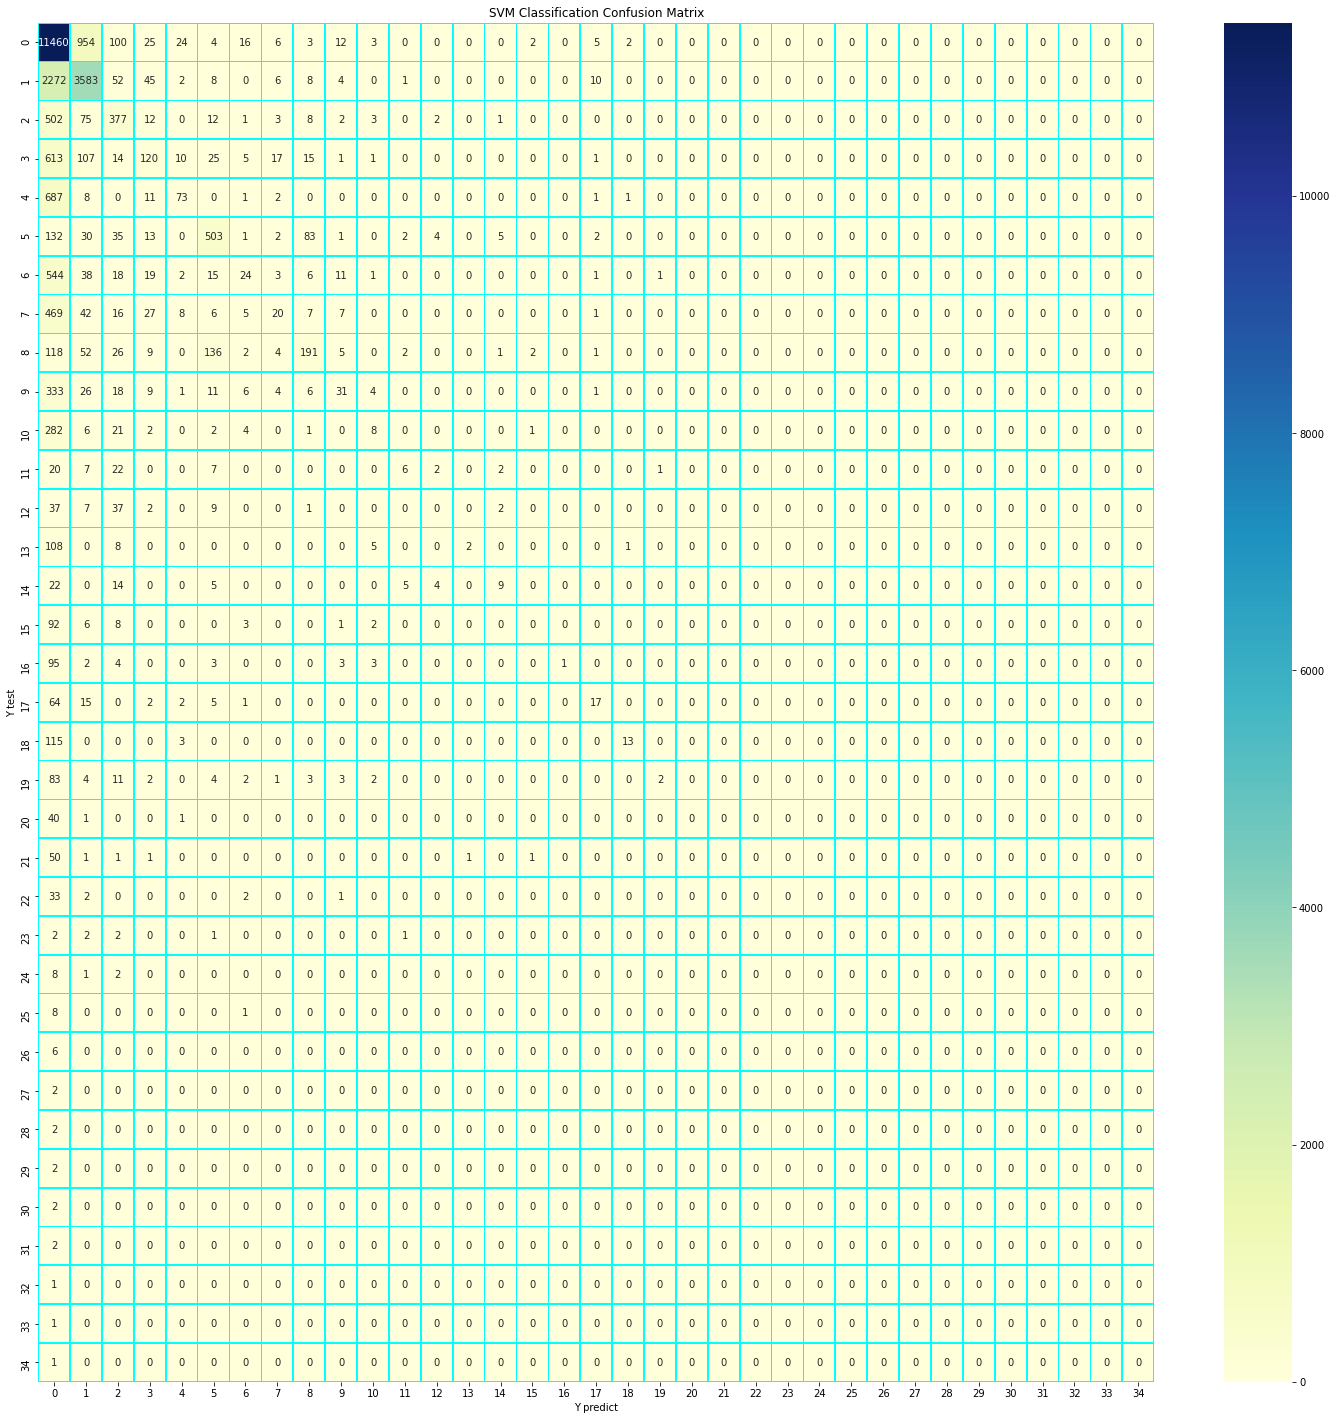

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#print(len(y_test))
#print(len(y_pred))
SVM_cm = confusion_matrix(y_test, y_pred)
f, p = plt.subplots(figsize=(25,25))
sns.heatmap(SVM_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=250,max_depth=30,random_state=42,n_jobs=-1,criterion='entropy')
#rf.fit(X_train, y_train)

In [78]:
#joblib.dump(rf,'/content/drive/MyDrive/MLproject/random-forest_model')
rf=joblib.load('/content/drive/MyDrive/MLproject/random-forest_model')
RF_Acc=rf.score(X_test,y_test)
print("random forest accuracy: ",rf.score(X_test,y_test))
y_pred=rf.predict(X_test)

random forest accuracy:  0.7564598483676311


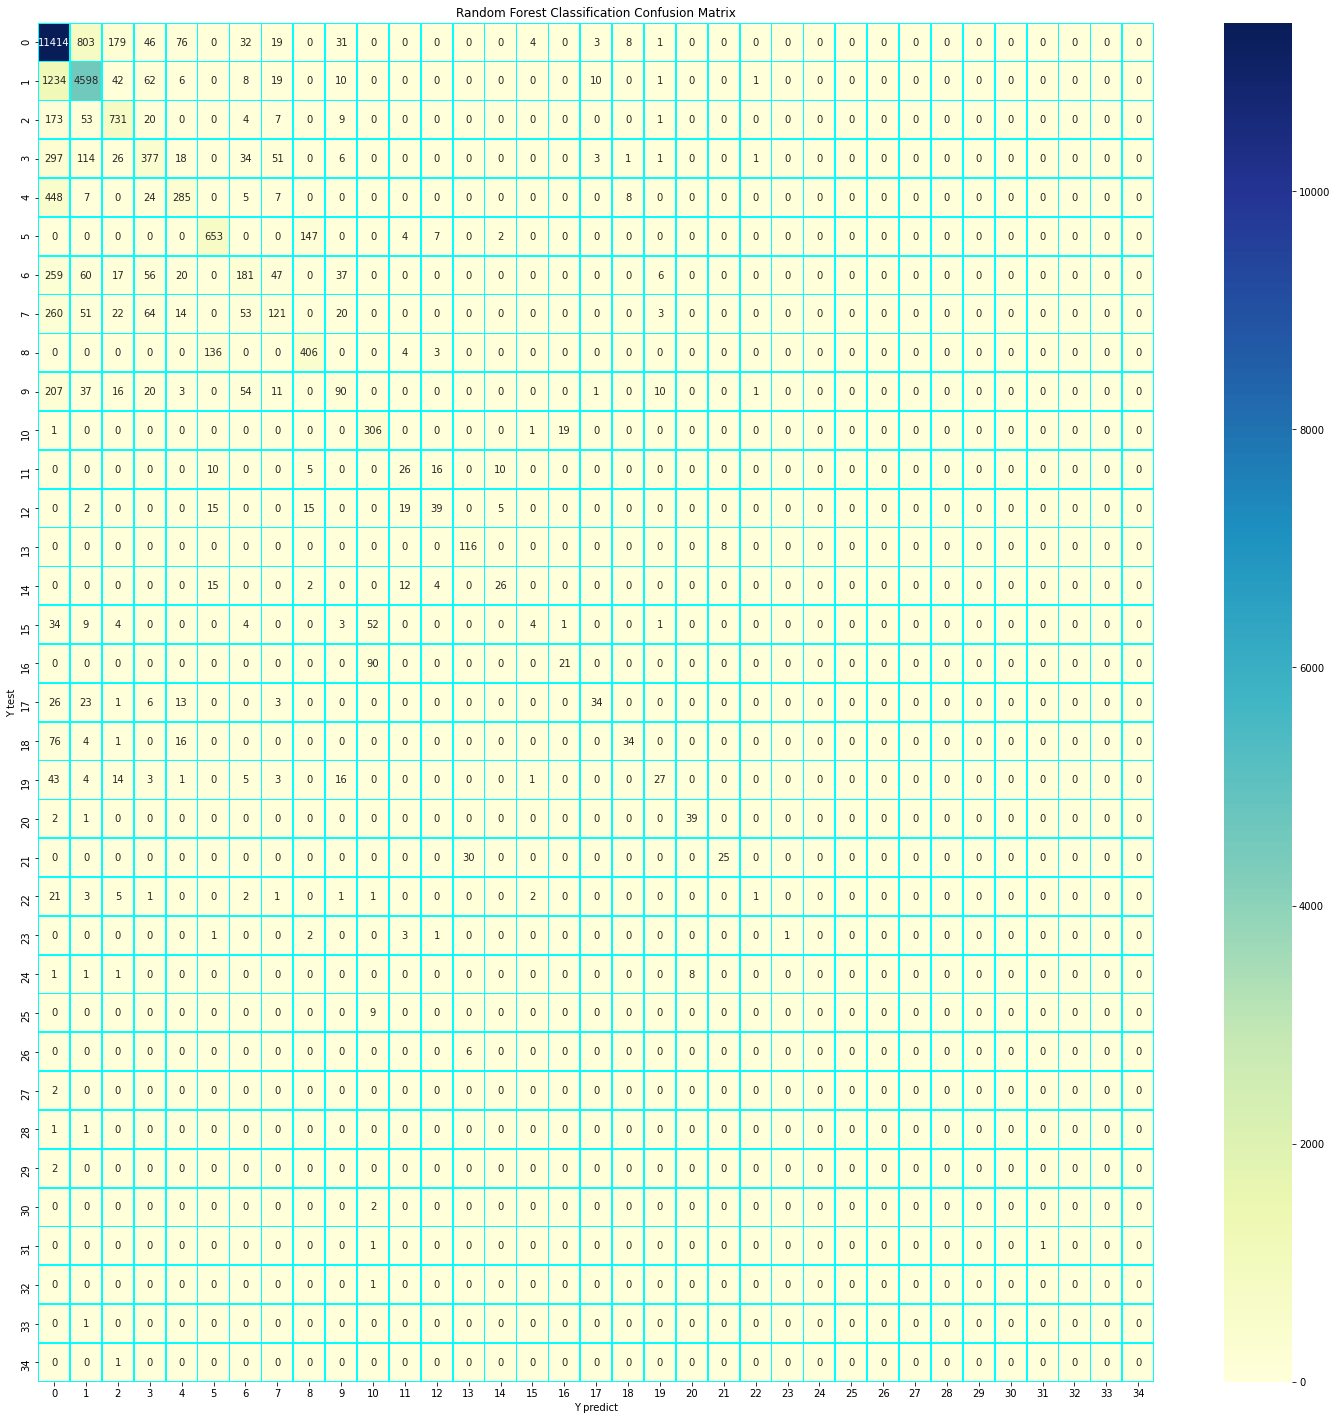

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#print(len(y_test))
#print(len(y_pred))
Random_cm = confusion_matrix(y_test, y_pred)
f, p = plt.subplots(figsize=(25,25))
sns.heatmap(Random_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=p, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data_copy.drop(['Temprature'],axis='columns')
Y = data_copy['Temprature'].astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train)

               Condition  Dewpoint  Fog  ...  WindDegree  WindDirection  WindSpeed
datetime_utc                             ...                                      
2009-04-18 09         18      11.0    0  ...       320.0              4  29.600000
1999-09-06 16          0      23.0    0  ...         0.0              0   0.000000
2002-05-17 19          3       9.0    0  ...         0.0              0   0.000000
2002-10-13 05          0      15.0    0  ...       110.0              6  14.800000
2001-05-21 15          0      23.0    0  ...       240.0              5   9.300000
...                  ...       ...  ...  ...         ...            ...        ...
1997-09-15 13          0      26.0    0  ...         0.0              0   0.000000
2004-02-10 20          3      13.0    0  ...       270.0              1   9.300000
2014-06-15 03          2      26.0    0  ...        70.0              7   7.400000
1996-12-12 22          1       1.0    0  ...         0.0              0   7.678463
1999

In [81]:
# from sklearn.linear_model import LogisticRegression
# from sklearn import preprocessing
# X_scaled = preprocessing.scale(X_train)
# reg = LogisticRegression(max_iter=1000).fit(X_scaled, y_train)

In [82]:
# joblib.dump(reg,'/content/drive/MyDrive/MLproject/Logistic_model2')
reg=joblib.load('/content/drive/MyDrive/MLproject/Logistic_model2')
#y_pred=reg.predict(X_test)
Reg_Acc2=reg.score(X_test,y_test)
print("Logistic Regression Accuracy: ",Reg_Acc2)

Logistic Regression Accuracy:  0.008974160606529476


In [83]:
import joblib
# clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
# clf = clf.fit(X_train, y_train)
# joblib.dump(clf,'/content/drive/MyDrive/MLproject/Decision_tree2_model')
clf=joblib.load('/content/drive/MyDrive/MLproject/Decision_tree2_model')
y_pred= clf.predict(X_test)
DT_Acc2=accuracy_score(y_pred, y_test)
print("Decision Tree Accuracy:",DT_Acc2)


Decision Tree Accuracy: 0.8221414203930063


In [84]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier()
# neigh.fit(X_train, y_train)

In [85]:
#joblib.dump(neigh,'/content/drive/MyDrive/MLproject/KNN2_Model')
neigh=joblib.load('/content/drive/MyDrive/MLproject/KNN2_Model')
y_pred=neigh.predict(X_test)
KNN_Acc2=neigh.score(X_test,y_test)
print("KNN neighbour Accuracy: ",KNN_Acc2)

KNN neighbour Accuracy:  0.27518180411573573


In [86]:
# from sklearn.svm import SVC
# svclassifier = SVC(kernel='rbf',degree=15,gamma='auto',C=1,decision_function_shape='ovo')
# svclassifier.fit(X_train, y_train)

In [87]:
#joblib.dump(svclassifier,'/content/drive/MyDrive/MLproject/SVM2_ovo_model')
svclassifier=joblib.load('/content/drive/MyDrive/MLproject/SVM2_ovo_model')
SVM_Acc2=svclassifier.score(X_test,y_test)
print("SVM accuracy: ",SVM_Acc2)
#y_pred=svclassifier.predict(X_test)

SVM accuracy:  0.32682190933003247


In [88]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=250,max_depth=30,random_state=42,n_jobs=-1,criterion='entropy')
# rf.fit(X_train, y_train)

In [ ]:
import joblib
#joblib.dump(rf,'/content/drive/MyDrive/MLproject/random-forest2_model')
rf=joblib.load('/content/drive/MyDrive/MLproject/random-forest2_model')
RF_Acc2=rf.score(X_test,y_test)
print("random forest accuracy: ",RF_Acc2)
#y_pred=rf.predict(X_test)

In [ ]:
print('The target vales as Condition')
print('classication model \t accuracy')
print('Logistic Regression\t',DT_Acc)
print('SVM\t',SVM_Acc)
print('KNN \t',KNN_Acc)
print('Decision Tree\t',DT_Acc)
print('Random Forest\t',RF_Acc)
print('The target vales as Temperature')
print('classication model \t accuracy')
print('Logistic Regression\t',DT_Acc2)
print('SVM\t',SVM_Acc2)
print('KNN \t',KNN_Acc2)
print('Decision Tree\t',DT_Acc2)
print('Random Forest\t',RF_Acc2)


# New section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [161]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns 
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import r2_score

In [88]:
data_loaded = pd.read_csv('/content/testset.csv', parse_dates=['datetime_utc'], index_col='datetime_utc')
print(data_loaded.shape)

(100990, 19)


In [89]:
data_loaded = data_loaded.rename(index=str, columns={' _conds': 'Condition',' _dewptm': 'Dewpoint', ' _fog': 'Fog',' _hum': 'Humidity', '_pressurem': 'Pressure',
                                       ' _tempm': 'Temperature',' _fog': 'Fog',' _heatindexm': 'HeatIndex',' _hail': 'Hail',' _rain': 'Rain',
                                       ' _snow': 'Snow',' _thunder': 'Thunder',' _tornado': 'Tornado',' _pressurem': 'Pressure',' _precipm': 'precipitationType',
                                      ' _vism': 'Visibility',	' _wdird': 'WindDegree', ' _wdire': 'WindDirection',' _wgustm': 'Wgustm',
                                       ' _windchillm':'WindChillm',' _wspdm': 'WindSpeed'})

In [90]:
final_data = data_loaded.loc[:,['Condition','Humidity','Temperature']]

In [91]:
final_data.dtypes

Condition       object
Humidity       float64
Temperature    float64
dtype: object

In [92]:
categorical_nums={"Haze": 0, "Smoke": 1, "Mist": 2, "Clear": 3, "Widespread Dust": 4, "Fog": 5, "Scattered Clouds": 6,
                  "Partly Cloudy": 7, "Shallow Fog": 8, "Mostly Cloudy": 9, "Light Rain": 10, "Partial Fog": 11, "Patches of Fog" : 12,
                  "Thunderstorms and Rain": 13, "Heavy Fog": 14, "Light Drizzle": 15, "Rain": 16, "Unknown": 17, "Blowing Sand": 18,
                  "Overcast": 19, "Thunderstorm": 20, "Light Thunderstorms and Rain": 21, "Drizzle": 22, "Light Fog": 23, 
                  "Light Thunderstorm": 24, "Heavy Rain": 25, "Heavy Thunderstorms and Rain":26, "Thunderstorms with Hail": 27,
                  "Light Sandstorm": 28, "Squalls": 29, "Light Rain Showers":30, "Volcanic Ash":31, "Light Haze":32, "Rain Showers":33 ,
                  "Sandstorm":34, "Funnel Cloud":35, "Heavy Thunderstorms with Hail":36, "Light Freezing Rain":37, "Light Hail Showers":38}
final_data.replace(categorical_nums, inplace=True)

In [93]:
# lets check dtype of all columns, 
final_data.index.dtype

dtype('O')

In [94]:
final_data.index = pd.to_datetime(final_data.index)
final_data.index

DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=100990, freq=None)

In [95]:
percent = ((final_data.isnull().sum())/(final_data.isnull().count()))
print(final_data.isnull().sum())
print(percent*100)

Condition       72
Humidity       757
Temperature    673
dtype: int64
Condition      0.071294
Humidity       0.749579
Temperature    0.666403
dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3132f3b940>,
      dtype=object)

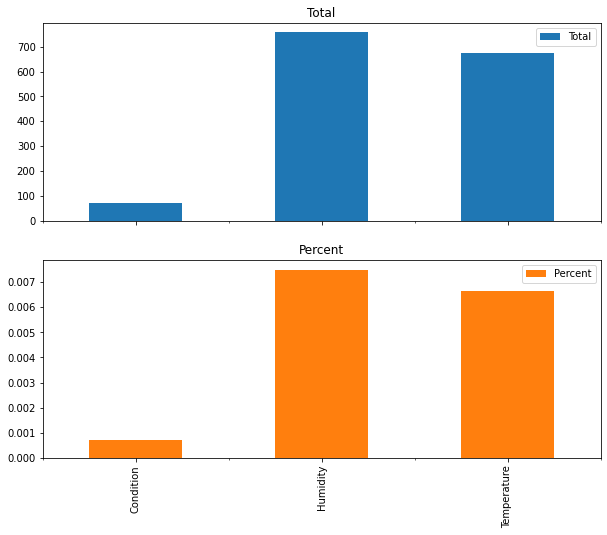

In [96]:
total = final_data.isnull().sum()
percent = ((final_data.isnull().sum())/(final_data.isnull().count()))
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) 
missing_data.plot.bar(subplots=True, figsize=(10,8))

In [97]:
# will fill with previous valid value
final_data.ffill(inplace=True)

In [98]:
final_data.describe()

Condition       Humidity    Temperature
count  100990.000000  100990.000000  100990.000000
mean        2.237212      57.957422      25.438222
std         3.942541      23.821218       8.487994
min         0.000000       4.000000       1.000000
25%         0.000000      39.000000      19.000000
50%         1.000000      59.000000      27.000000
75%         2.000000      78.000000      32.000000
max        38.000000     243.000000      90.000000

In [99]:
final_data = final_data[final_data.Temperature < 50]
final_data = final_data[final_data.Humidity <= 100]

In [100]:
final_data.describe()

Condition       Humidity    Temperature
count  100983.000000  100983.000000  100983.000000
mean        2.237208      57.955309      25.436361
std         3.942535      23.805467       8.482944
min         0.000000       4.000000       1.000000
25%         0.000000      39.000000      19.000000
50%         1.000000      59.000000      27.000000
75%         2.000000      78.000000      32.000000
max        38.000000     100.000000      47.000000

In [101]:
plotting_data = final_data.loc[:,['Humidity','Temperature']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f314314a828>,
      dtype=object)

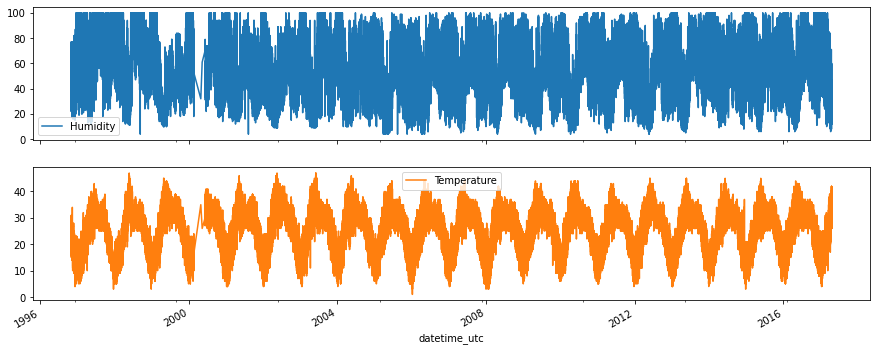

In [102]:
plotting_data.plot(subplots=True, figsize=(15,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f313231bef0>,
      dtype=object)

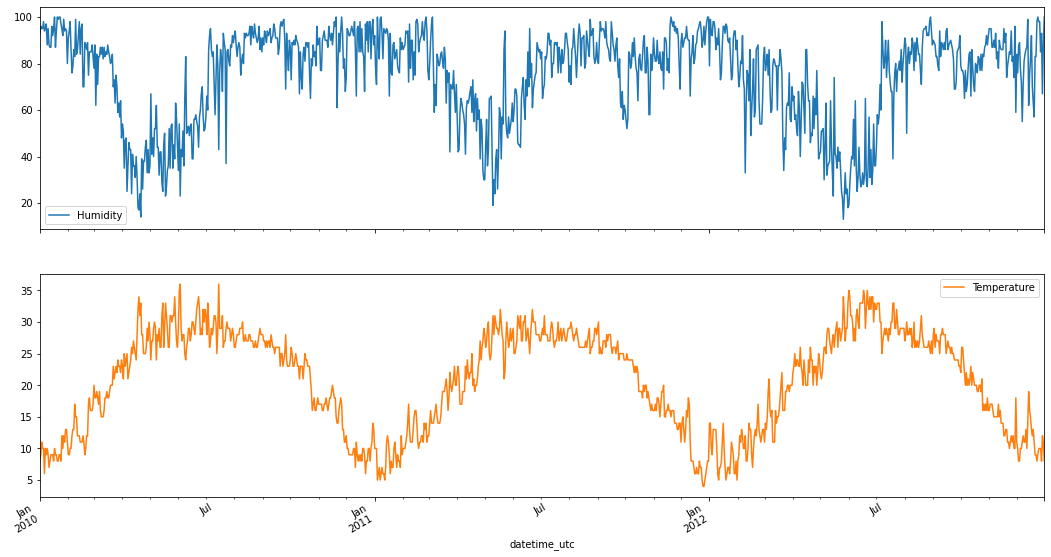

In [103]:
plotting_data['2010':'2012'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(18,10))

In [104]:
train_data = final_data['2000':'2015'].resample('M').mean().fillna(method='pad')
train_data.drop(columns=['Condition','Humidity'], axis=1, inplace=True)
test_data = final_data['2016':'2017'].resample('M').mean().fillna(method='pad')
test_data.drop(columns=['Condition','Humidity'], axis=1, inplace=True)

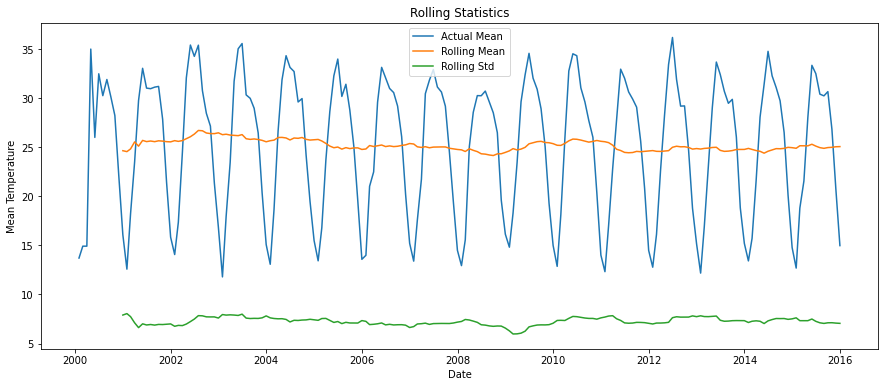

In [110]:
r_mean= train_data.Temperature.rolling(12).mean()
r_std = train_data.Temperature.rolling(12).std()
plt.figure(figsize=(15,6))

plt.plot(train_data.Temperature, label='Actual Mean')
plt.plot(r_mean, label='Rolling Mean')
plt.plot(r_std, label = 'Rolling Std')
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.title('Rolling Statistics')
plt.legend()
plt.show()

In [124]:
df = pd.Series()
res = adfuller(train_data.Temperature, autolag='AIC')
print('Test statistic: ' , res[0])
for  key,value in res[4].items():
  df["Critical Value (%s)"%key] = value
print(df)

Test statistic:  -2.126995250298025
Critical Value (1%)    -3.467420
Critical Value (5%)    -2.877826
Critical Value (10%)   -2.575452
dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


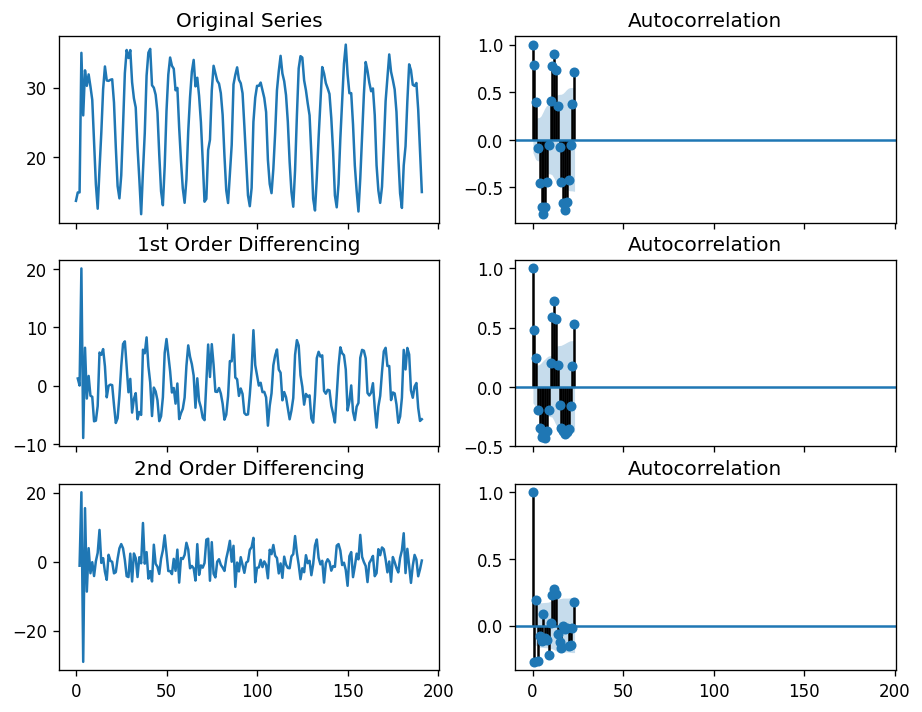

In [129]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3,2, sharex=True)
axes[0, 0].plot(train_data.values); 
axes[0, 0].set_title('Original Series')
plot_acf(train_data.values, ax=axes[0, 1])

axes[1, 0].plot(train_data.Temperature.diff().values); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train_data.diff().dropna().values,ax=axes[1, 1])

axes[2, 0].plot(train_data.Temperature.diff().diff().values); 
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train_data.diff().diff().dropna().values,ax=axes[2, 1])

plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


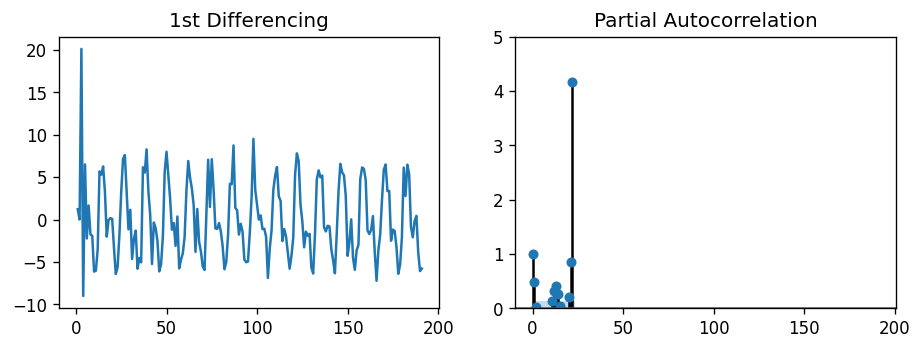

In [131]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_data.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(train_data.diff().dropna().values, ax=axes[1])

plt.show()

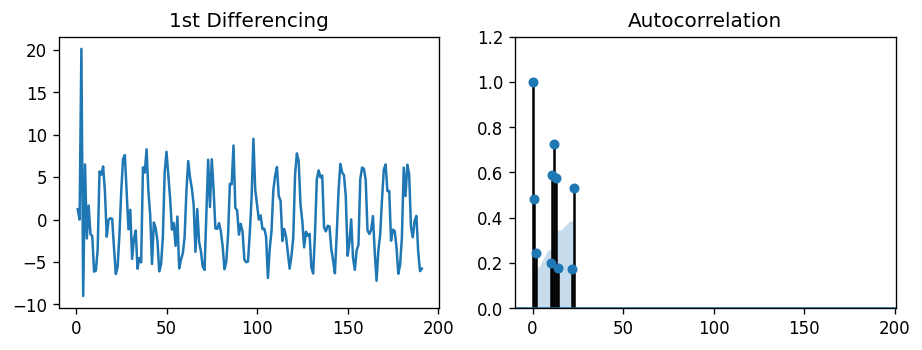

In [133]:
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(train_data.diff().values); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(train_data.diff().dropna().values, ax=axes[1])

plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


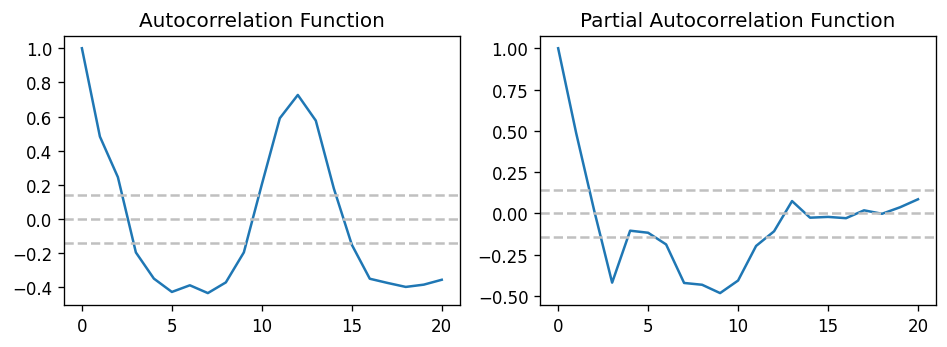

In [148]:
acf_lag = acf(train_data.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_data.diff().dropna().values, nlags=20, method='ols')
conf =np.sqrt(len(train_data.diff().values))

plt.figure(figsize=(8,3))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/conf,linestyle='--',color='silver')
plt.axhline(y=1.96/conf,linestyle='--',color='silver')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/conf,linestyle='--',color='silver')
plt.axhline(y=1.96/conf,linestyle='--',color='silver')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [141]:
model = ARIMA(train_data.values, order=(2,0,2))
clf = model.fit(disp=0)

In [142]:
print(clf.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  192
Model:                     ARMA(2, 2)   Log Likelihood                -454.355
Method:                       css-mle   S.D. of innovations              2.552
Date:                Fri, 18 Dec 2020   AIC                            920.709
Time:                        16:40:03   BIC                            940.254
Sample:                             0   HQIC                           928.625
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1917      0.119    211.045      0.000      24.958      25.426
ar.L1.y        1.6785      0.024     69.834      0.000       1.631       1.726
ar.L2.y       -0.9519      0.023    -41.163      0.0

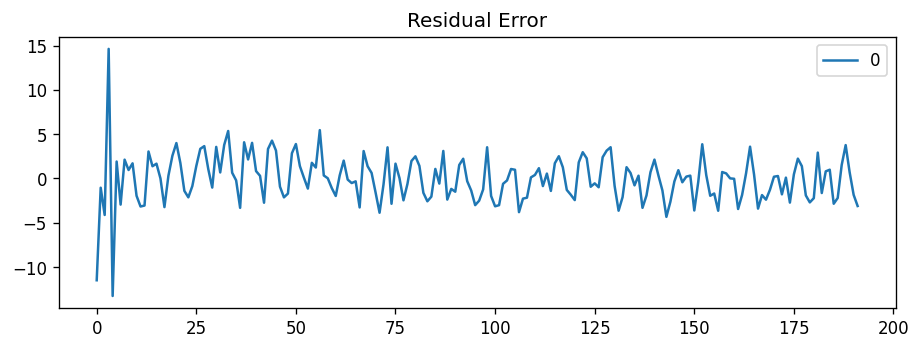

In [147]:
rss = pd.DataFrame(clf.resid)
rss.plot(title="Residual Error")

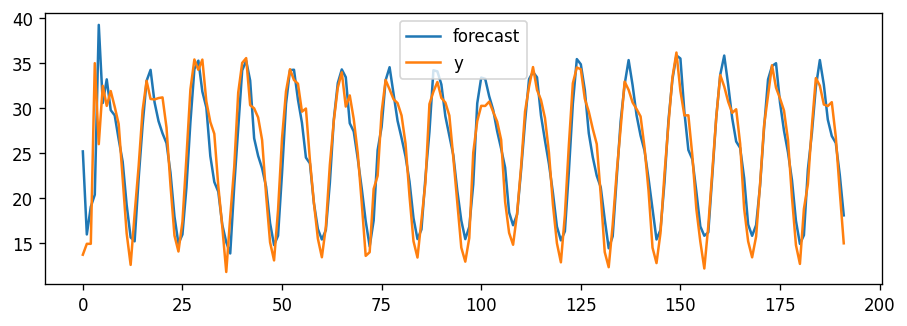

In [150]:
# Actual vs Fitted
clf.plot_predict()
plt.show()

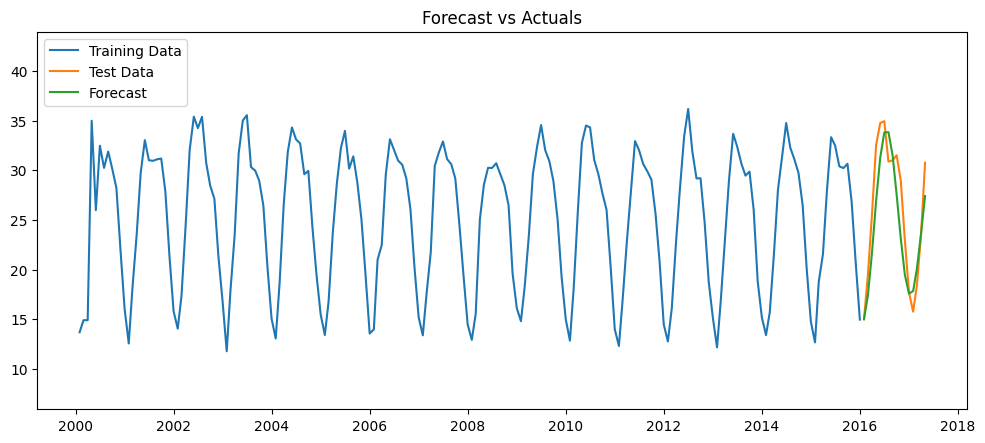

In [157]:
forecast, se, confi = clf.forecast(16, alpha=0.05)

forecast_series = pd.Series(forecast, index=test_data.index)
lower_limit = pd.Series(conf[:, 0], index=test_data.index)
upper_limit = pd.Series(conf[:, 1], index=test_data.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(fc_series, label='Forecast')
plt.fill_between(lower_limit.index, lower_limit, upper_limit, color='k', alpha=0)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left')
plt.show()

In [158]:
print(test_data.Temperature)
print(forecast_series)

datetime_utc
2016-01-31    15.007752
2016-02-29    19.468193
2016-03-31    25.696391
2016-04-30    32.546841
2016-05-31    34.777344
2016-06-30    34.956044
2016-07-31    30.887526
2016-08-31    31.010554
2016-09-30    31.531646
2016-10-31    28.975155
2016-11-30    23.041787
2016-12-31    17.736682
2017-01-31    15.772370
2017-02-28    18.414062
2017-03-31    23.553459
2017-04-30    30.775120
Freq: M, Name: Temperature, dtype: float64
datetime_utc
2016-01-31    15.021965
2016-02-29    17.395290
2016-03-31    21.786181
2016-04-30    26.897027
2016-05-31    31.295773
2016-06-30    33.813946
2016-07-31    33.853464
2016-08-31    31.522735
2016-09-30    27.573037
2016-10-31    23.162176
2016-11-30    19.518369
2016-12-31    17.601027
2017-01-31    17.851362
2017-02-28    20.096670
2017-03-31    23.627079
2017-04-30    27.415484
Freq: M, dtype: float64


In [162]:
print(r2_score(test_data.Temperature, forecast_series))

0.7856204698770091


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import SimpleRNN, LSTM, GRU, Dense 
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model
from keras.utils import to_categorical
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import numpy as np
from keras.layers import Bidirectional
from keras.layers import Dropout
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading data
data = pd.read_csv('/content/drive/MyDrive/testset.csv')
print("Shape of the data is: ", data.shape)
data

Shape of the data is:  (100990, 20)


datetime_utc  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
0       19961101-11:00   Smoke       9.0  ...       NaN           NaN      7.4
1       19961101-12:00   Smoke      10.0  ...       NaN           NaN      NaN
2       19961101-13:00   Smoke      11.0  ...       NaN           NaN      NaN
3       19961101-14:00   Smoke      10.0  ...       NaN           NaN      NaN
4       19961101-16:00   Smoke      11.0  ...       NaN           NaN      0.0
...                ...     ...       ...  ...       ...           ...      ...
100985  20170424-06:00    Haze      17.0  ...       NaN           NaN     11.1
100986  20170424-09:00    Haze      14.0  ...       NaN           NaN     22.2
100987  20170424-12:00    Haze      12.0  ...       NaN           NaN     18.5
100988  20170424-15:00    Haze      15.0  ...       NaN           NaN      3.7
100989  20170424-18:00    Haze      15.0  ...       NaN           NaN      3.7

[100990 rows x 20 columns]

In [ ]:
data_copy=data.copy()

In [ ]:
data_copy = data_copy.rename(index=str, columns={' _conds': 'Condition',' _dewptm': 'Dewpoint', ' _fog': 'Fog',' _hum': 'Humidity', '_pressurem': 'Pressure',
                                       ' _tempm': 'Temprature',' _fog': 'Fog',' _heatindexm': 'HeatIndex',' _hail': 'Hail',' _rain': 'Rain',
                                       ' _snow': 'Snow',' _thunder': 'Thunder',' _tornado': 'Tornado',' _pressurem': 'Pressure',' _precipm': 'precipitationType',
                                      ' _vism': 'Vism',	' _wdird': 'WindDegree', ' _wdire': 'WindDirection',' _wgustm': 'Wgustm',
                                       ' _windchillm':'WindChillm',' _wspdm': 'WindSpeed'})

In [ ]:
data_copy.head()

datetime_utc Condition  Dewpoint  ...  Wgustm  WindChillm  WindSpeed
0  19961101-11:00     Smoke       9.0  ...     NaN         NaN        7.4
1  19961101-12:00     Smoke      10.0  ...     NaN         NaN        NaN
2  19961101-13:00     Smoke      11.0  ...     NaN         NaN        NaN
3  19961101-14:00     Smoke      10.0  ...     NaN         NaN        NaN
4  19961101-16:00     Smoke      11.0  ...     NaN         NaN        0.0

[5 rows x 20 columns]

In [ ]:
data_copy['datetime_utc']

0         19961101-11:00
1         19961101-12:00
2         19961101-13:00
3         19961101-14:00
4         19961101-16:00
               ...      
100985    20170424-06:00
100986    20170424-09:00
100987    20170424-12:00
100988    20170424-15:00
100989    20170424-18:00
Name: datetime_utc, Length: 100990, dtype: object

In [ ]:
# data_copy.fillna(data_copy.mean(),inplace=True)

In [ ]:
# data_copy['datetime_utc'] = pd.to_datetime(data_copy['datetime_utc'])
# data_copy.set_index('datetime_utc', inplace= True)

In [ ]:
data_copy['datetime_utc'] = pd.to_datetime(data_copy['datetime_utc'])
data_copy.set_index('datetime_utc', inplace= True)
data_copy =data_copy.resample('D').mean() #Resample the data according to days 

In [ ]:
data_copy.head()

Dewpoint  Fog  Hail  ...  Wgustm  WindChillm  WindSpeed
datetime_utc                        ...                               
1996-11-01    11.666667  0.0   0.0  ...     NaN         NaN   2.466667
1996-11-02    10.458333  0.0   0.0  ...     NaN         NaN   8.028571
1996-11-03    12.041667  0.0   0.0  ...     NaN         NaN   4.804545
1996-11-04    10.222222  0.0   0.0  ...     NaN         NaN   1.964706
1996-11-05     8.200000  0.0   0.0  ...     NaN         NaN  10.020000

[5 rows x 17 columns]

In [ ]:
#removed columns
data_copy.drop(columns=["Dewpoint",	"Humidity","Pressure","Fog",	"Hail","HeatIndex","precipitationType","Rain",	"Snow","Thunder",	"Tornado",	"Vism",	"WindDegree",	"Wgustm",	"WindChillm",	"WindSpeed"],inplace=True)

In [ ]:
data_copy.fillna(data_copy.mean(),inplace=True)

In [ ]:
data_copy.head()

Temprature
datetime_utc            
1996-11-01     22.333333
1996-11-02     22.916667
1996-11-03     21.791667
1996-11-04     22.722222
1996-11-05     27.800000

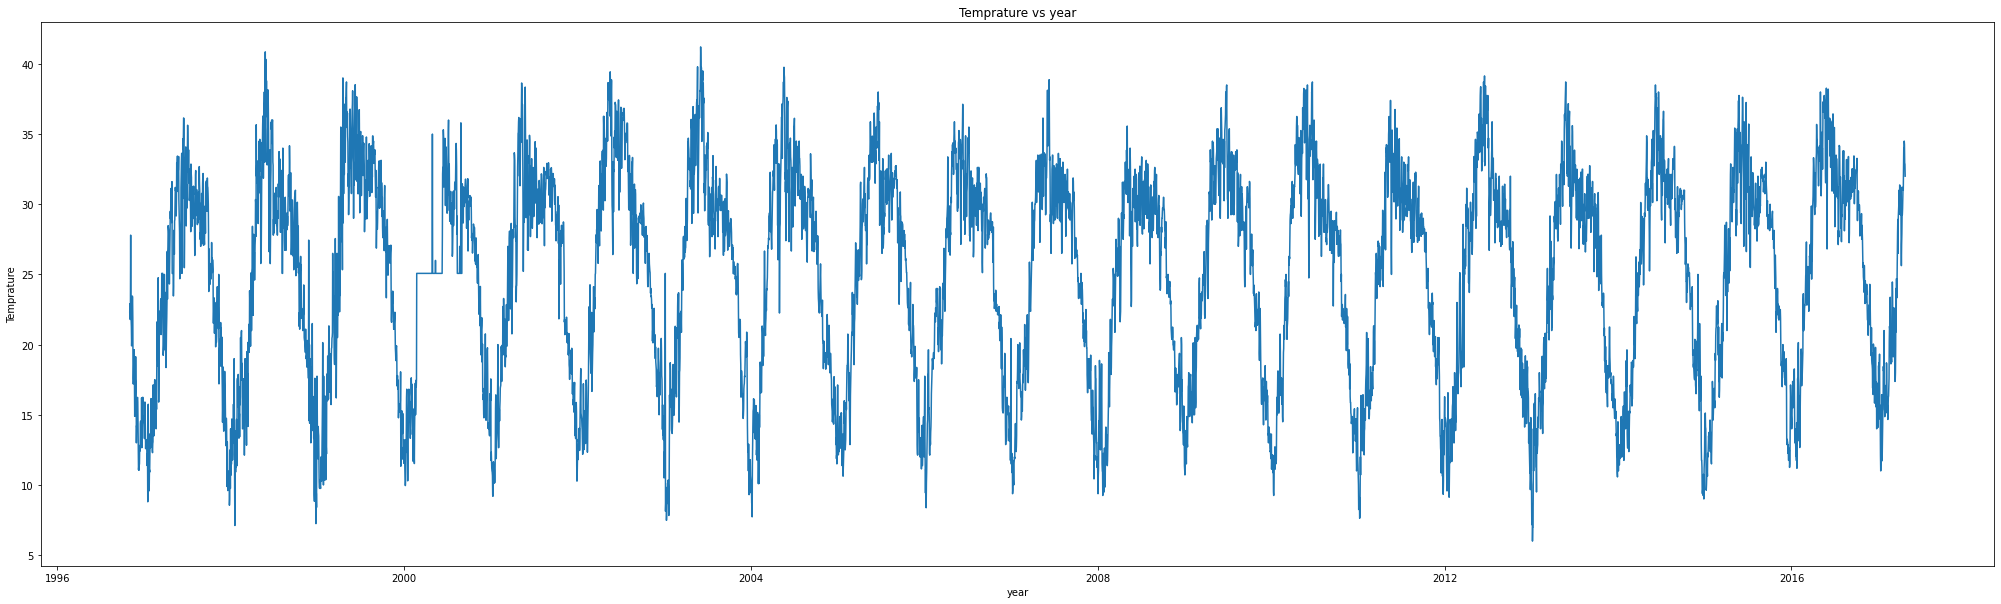

In [ ]:
# data_copy = data.resample('D').mean()
plt.figure(figsize=(35,10))
plt.plot(data_copy["Temprature"])
plt.xlabel("year")
plt.ylabel("Temprature")
plt.title("Temprature vs year")
plt.show()

In [ ]:
#split the data in ratio  = 90:10
train_size = int(len(data_copy) * 0.9)
test_size = len(data_copy) - train_size
train, test = data_copy.iloc[0:train_size], data_copy.iloc[train_size:len(data_copy)]
print(len(train), len(test))

6732 748


In [ ]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train = sc.fit_transform(train)

In [ ]:
test = sc.transform(test)

In [ ]:
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [ ]:
train.head()

0
0  0.463876
1  0.480443
2  0.448493
3  0.474921
4  0.619133

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps].values)
    return np.array(Xs), np.array(ys)

In [ ]:
# X = train.iloc[:,:-1]
# y= train.iloc[:,-1:]
# time_steps=7
# Xs, ys = [], []
# for i in range(len(X) - time_steps):
#     v = X.iloc[i:(i + time_steps)].values
#     Xs.append(v)
#     ys.append(y.iloc[i + time_steps].values)


In [ ]:
# ys

In [ ]:
# Xs =np.asarray(Xs)
# ys = np.asarray(ys)

In [ ]:
# temp = train.iloc[:,:-1].copy()
# temp2 = train.iloc[:,-1:].copy()

In [ ]:
# temp

In [ ]:
# temp.iloc[7].values
# temp2.iloc[7].values

In [ ]:
time_steps = 7 # so that we take 7 days of data as one train sample and will have a corrresponding weather prediction
# reshape to [samples, time_steps, n_features]
temp = train.iloc[:,:].copy()
temp2 = train.iloc[:,-1:].copy()
temp3 = test.iloc[:,:].copy()
temp4 = test.iloc[:,-1:].copy()
X_train, y_train = create_dataset(temp, temp2, time_steps)
X_test, y_test = create_dataset(temp3, temp4, time_steps)
y_train = y_train.ravel()
y_test = y_test.ravel()
print(X_train.shape, y_train.shape)

(6725, 7, 1) (6725,)


In [ ]:
print(X_test.shape,y_test.shape)

(741, 7, 1) (741,)


In [ ]:
print("The temprature are scaled")
print("training set sample :{} and prediction : {} ".format(X_train[0].ravel(),y_train[0]))

The temprature are scaled
training set sample :[0.46387643 0.48044345 0.44849278 0.47492111 0.61913303 0.45263453
 0.44730942] and prediction : 0.43341782023786307 


In [ ]:
# time_steps = 7
# # reshape to [samples, time_steps, n_features]
# X_train, y_train = create_dataset(train, train.cnt, time_steps)
# X_test, y_test = create_dataset(test, test.cnt, time_steps)
# print(X_train.shape, y_train.shape)

In [ ]:
# X_train

In [ ]:
# model = keras.Sequential()
# model.add(
#   keras.layers.Bidirectional(
#     keras.layers.LSTM(
#       units=128,
#       input_shape=(X_train.shape[1], X_train.shape[2])
#     )
#   )
# )
# model.add(keras.layers.Dropout(rate=0.2))
# model.add(keras.layers.Dense(units=1))
# model.compile(loss='mean_squared_error', optimizer='adam')
model = Sequential()
model.add(Bidirectional(LSTM(128,input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# model = Sequential()
# model.add(LSTM(128,input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True,activation="relu"))
# model.add(Dropout(0.2))
# model.add(LSTM(64,return_sequences=False,activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_32 (Bidirectio (None, 7, 256)            133120    
_________________________________________________________________
dropout_36 (Dropout)         (None, 7, 256)            0         
_________________________________________________________________
bidirectional_33 (Bidirectio (None, 128)               164352    
_________________________________________________________________
dropout_37 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 297,601
Trainable params: 297,601
Non-trainable params: 0
_________________________________________________________________


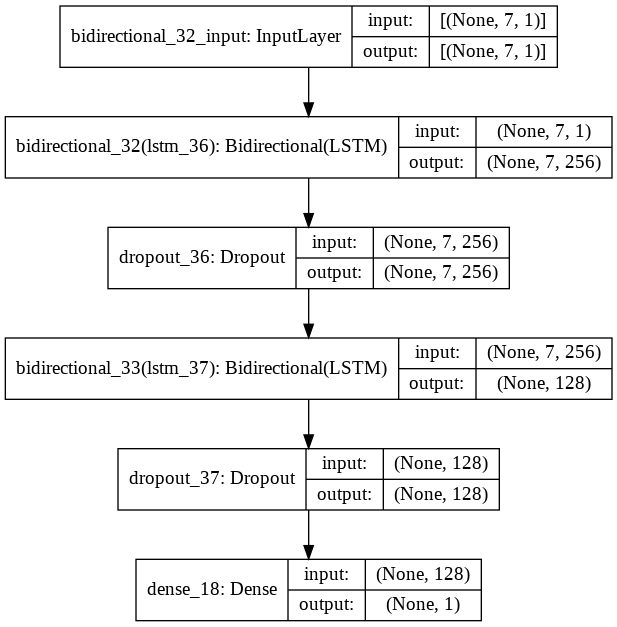

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

Epoch 1/60
190/190 [==============================] - 9s 15ms/step - loss: 0.0133 - val_loss: 0.0030
Epoch 2/60
190/190 [==============================] - 2s 8ms/step - loss: 0.0063 - val_loss: 0.0028
Epoch 3/60
190/190 [==============================] - 2s 9ms/step - loss: 0.0060 - val_loss: 0.0027
Epoch 4/60
190/190 [==============================] - 2s 8ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 5/60
190/190 [==============================] - 2s 8ms/step - loss: 0.0053 - val_loss: 0.0024
Epoch 6/60
190/190 [==============================] - 2s 8ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 7/60
190/190 [==============================] - 2s 9ms/step - loss: 0.0061 - val_loss: 0.0022
Epoch 8/60
190/190 [==============================] - 2s 8ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 9/60
190/190 [==============================] - 2s 9ms/step - loss: 0.0040 - val_loss: 0.0021
Epoch 10/60
190/190 [==============================] - 2s 8ms/step - loss: 0.0042 - val_loss: 0.002

In [ ]:
model.save("/content/drive/MyDrive/projectModel")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/projectModel/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/projectModel/assets


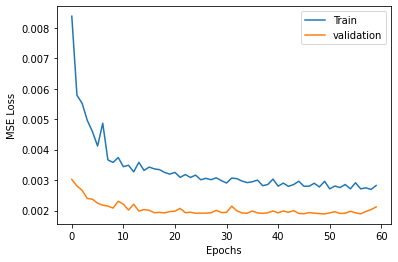

In [ ]:
plt.plot(history.history['loss'],label="Train")
plt.plot(history.history['val_loss'],label="validation")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
model.evaluate(X_test,y_test)

24/24 [==============================] - 0s 4ms/step - loss: 0.0023


0.0023075765930116177

In [ ]:
y_train_inv = sc.inverse_transform(y_train.reshape(1,-1))
y_test_inv = sc.inverse_transform(y_test.reshape(1,-1))
y_pred_inv = sc.inverse_transform(y_pred)

In [ ]:
y_pred_inv.shape

(741, 1)

In [ ]:
# y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
# y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
# y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [ ]:
print(y_test_inv.shape)
print(y_pred_inv.shape)
temp_y_test = y_test_inv.T
temp_pred = y_pred_inv

(1, 741)
(741, 1)


In [ ]:
# temp_y_test = cnt_transformer.inverse_transform(cnt_transformer.inverse_transform(temp_y_test))

In [ ]:
# temp_y_test

Text(0.5, 1.0, 'True temprature vs Predicted temprature')

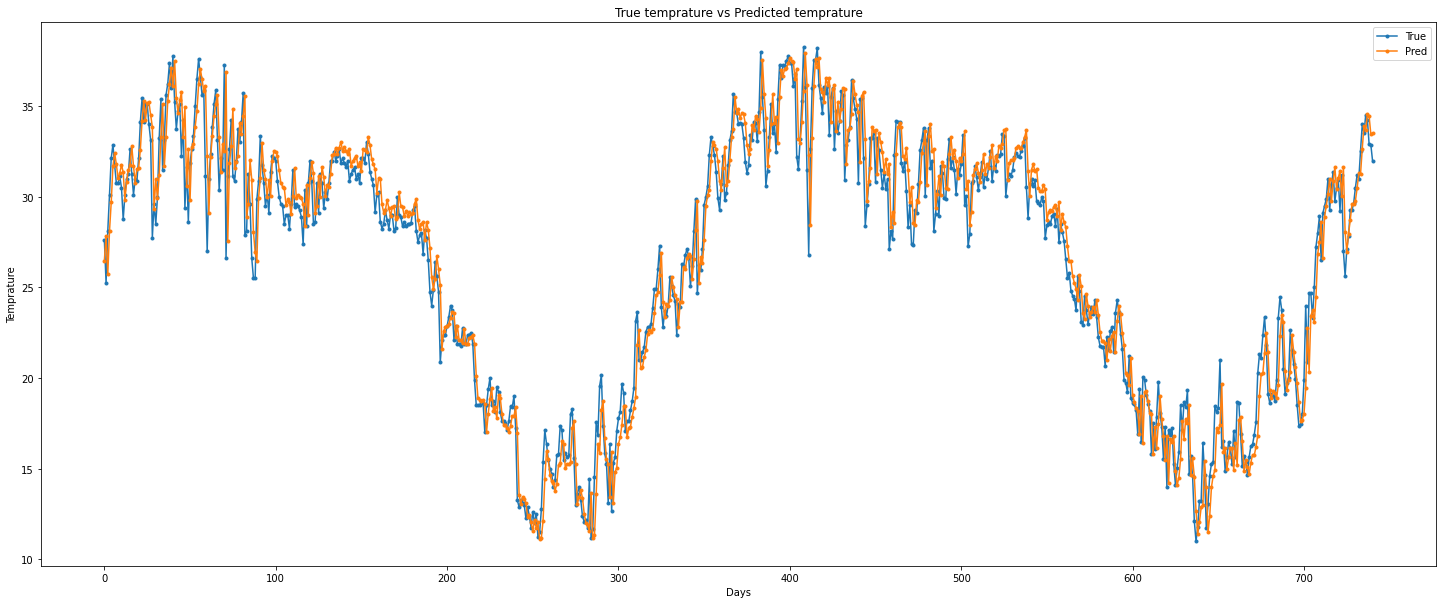

In [ ]:
plt.figure(figsize=[25,10])
plt.plot(y_test_inv.flatten(),marker=".",label="True")
plt.plot(y_pred_inv.flatten(),marker=".",label="Pred")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Temprature")
plt.title("True temprature vs Predicted temprature")

In [108]:
print("R2 Score (Regression score is) : ", r2_score(y_test_inv.T,y_pred_inv))

R2 Score (Regression score is) :  0.9399976005818501


In [ ]:
X_test.shape

(741, 7, 1)

In [ ]:
temp = X_test[:20]

In [ ]:
temp_pred = y_test[:20]

In [ ]:
temp_pred = sc.inverse_transform(temp_pred.reshape(1,-1))

In [ ]:
temp_pred

array([[27.625, 25.25 , 28.125, 30.125, 32.125, 32.875, 31.75 , 30.75 ,
        30.75 , 31.125, 30.5  , 28.75 , 30.125, 31.   , 31.25 , 32.625,
        31.25 , 30.125, 31.   , 30.875]])

In [ ]:
temp

array([[[0.55736173],
        [0.56801196],
        [0.59996263],
        [0.6319133 ],
        [0.52186099],
        [0.53251121],
        [0.57511211]],

       [[0.56801196],
        [0.59996263],
        [0.6319133 ],
        [0.52186099],
        [0.53251121],
        [0.57511211],
        [0.61416293]],

       [[0.59996263],
        [0.6319133 ],
        [0.52186099],
        [0.53251121],
        [0.57511211],
        [0.61416293],
        [0.54671151]],

       [[0.6319133 ],
        [0.52186099],
        [0.53251121],
        [0.57511211],
        [0.61416293],
        [0.54671151],
        [0.62836323]],

       [[0.52186099],
        [0.53251121],
        [0.57511211],
        [0.61416293],
        [0.54671151],
        [0.62836323],
        [0.68516442]],

       [[0.53251121],
        [0.57511211],
        [0.61416293],
        [0.54671151],
        [0.62836323],
        [0.68516442],
        [0.74196562]],

       [[0.57511211],
        [0.61416293],
        [0.54671151]

In [ ]:
temp2 = model.predict(temp)

In [ ]:
temp2

array([[0.57703084],
       [0.6156671 ],
       [0.558193  ],
       [0.62477976],
       [0.6677097 ],
       [0.7250583 ],
       [0.7457289 ],
       [0.726954  ],
       [0.7051139 ],
       [0.7125839 ],
       [0.72638667],
       [0.7143767 ],
       [0.6724032 ],
       [0.70025146],
       [0.7183629 ],
       [0.7262974 ],
       [0.7558856 ],
       [0.72397393],
       [0.69898325],
       [0.7200388 ]], dtype=float32)

In [ ]:
temp2 = sc.inverse_transform(temp2)

In [ ]:
temp2 = temp2.ravel()

In [ ]:
temp3 =[]
for x in temp:
  temp3.append(sc.inverse_transform(x))


In [ ]:
temp3 = np.asarray(temp3)

In [ ]:
temp3

array([[[25.625],
        [26.   ],
        [27.125],
        [28.25 ],
        [24.375],
        [24.75 ],
        [26.25 ]],

       [[26.   ],
        [27.125],
        [28.25 ],
        [24.375],
        [24.75 ],
        [26.25 ],
        [27.625]],

       [[27.125],
        [28.25 ],
        [24.375],
        [24.75 ],
        [26.25 ],
        [27.625],
        [25.25 ]],

       [[28.25 ],
        [24.375],
        [24.75 ],
        [26.25 ],
        [27.625],
        [25.25 ],
        [28.125]],

       [[24.375],
        [24.75 ],
        [26.25 ],
        [27.625],
        [25.25 ],
        [28.125],
        [30.125]],

       [[24.75 ],
        [26.25 ],
        [27.625],
        [25.25 ],
        [28.125],
        [30.125],
        [32.125]],

       [[26.25 ],
        [27.625],
        [25.25 ],
        [28.125],
        [30.125],
        [32.125],
        [32.875]],

       [[27.625],
        [25.25 ],
        [28.125],
        [30.125],
        [32.125],
        [32.87

In [ ]:
temp_pred = temp_pred.ravel()
for i in range(len(temp3)):
  print("prediction for {} : {} and actual prediction {}".format(temp3[i].ravel(),temp_pred[i],temp2[i]))

prediction for [25.625 26.    27.125 28.25  24.375 24.75  26.25 ] : 27.625000000000004 and actual prediction 26.31756019592285
prediction for [26.    27.125 28.25  24.375 24.75  26.25  27.625] : 25.250000000000004 and actual prediction 27.677963256835938
prediction for [27.125 28.25  24.375 24.75  26.25  27.625 25.25 ] : 28.125 and actual prediction 25.65427017211914
prediction for [28.25  24.375 24.75  26.25  27.625 25.25  28.125] : 30.125000000000004 and actual prediction 27.998825073242188
prediction for [24.375 24.75  26.25  27.625 25.25  28.125 30.125] : 32.125 and actual prediction 29.51041030883789
prediction for [24.75  26.25  27.625 25.25  28.125 30.125 32.125] : 32.875 and actual prediction 31.529685974121094
prediction for [26.25  27.625 25.25  28.125 30.125 32.125 32.875] : 31.75 and actual prediction 32.25750732421875
prediction for [27.625 25.25  28.125 30.125 32.125 32.875 31.75 ] : 30.75 and actual prediction 31.596433639526367
prediction for [25.25  28.125 30.125 32.12